In [18]:
#Open json file
import json
len_array = []
with open('arc-agi_training_challenges.json', 'r') as file:
    training_challenges = json.load(file)
with open('arc-agi_training_solutions.json', 'r') as file:
    training_solutions = json.load(file)
with open('arc-agi_evaluation_challenges.json', 'r') as file:
    evaluation_challenges = json.load(file)
with open('arc-agi_evaluation_solutions.json', 'r') as file:
    evaluation_solutions = json.load(file)

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json

In [20]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown, "-1":white

cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25', '#FFFFFF'])
norm = colors.Normalize(vmin=0, vmax=9)

In [21]:
def plot_task(task, task_solutions, i, t, size=2.5, w1=0.9):
    t=list(training_challenges)[i]
    titleSize=16    
    num_train = len(task['train'])
    num_test  = len(task['test'])
    
    wn=num_train+num_test
    fig, axs  = plt.subplots(2, wn, figsize=(size*wn,2*size))
    plt.suptitle(f'Task #{i}, {t}', fontsize=titleSize, fontweight='bold', y=1, color = '#eeeeee')
   
    '''train:'''
    for j in range(num_train):     
        plot_one(axs[0, j], j,task, 'train', 'input',  w=w1)
        plot_one(axs[1, j], j,task, 'train', 'output', w=w1)
    
    '''test:'''
    for k in range(num_test):
        plot_one(axs[0, j+k+1], k, task, 'test', 'input', w=w1)
        task['test'][k]['output'] = task_solutions[k]
        plot_one(axs[1, j+k+1], k, task, 'test', 'output', w=w1)
    
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, wn])
    
    '''Separators:'''
    colorSeparator = 'white'
    for m in range(1, wn):
        axs[1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = colorSeparator)
    axs[1, j+1].plot([num_train,num_train],[0,1],'-', linewidth=3, color = colorSeparator)

    axs[1, j+1].axis("off")

    '''Frame and background:'''
    fig.patch.set_linewidth(5) #widthframe
    fig.patch.set_edgecolor('black') #colorframe
    fig.patch.set_facecolor('#444444') #background
   
    plt.tight_layout()
    
    print(f'#{i}, {t}') # for fast and convinience search
    plt.show()  
   
def plot_one(ax, i, task, train_or_test, input_or_output, solution=None, w=0.8):
    fs=12
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    
    #ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 1.0)
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    
    '''Grid:'''
    ax.grid(visible= True, which = 'both', color = '#666666', linewidth = w)
    
    ax.tick_params(axis='both', color='none', length=0)
   
    '''sub title:'''
    ax.set_title(train_or_test + ' ' + input_or_output, fontsize=fs, color = '#dddddd')

In [22]:
"""
steps = 
[
    {
        'action': "copy" | "fill" | "fill-boundary" | "rotate" | "flip" | "project" | "project-force"| "resize" | "clear",
        'options': {
            'position': {x, y , 'source': 'input' | 'output', matrix_index: int},
            'size': {width, height},
            'color': int,
            'direction': 'up' | 'down' | 'left' | 'right' | 'horizontal' | 'vertical',
            'from': {
                'position': { 'x': 0, 'y': 0, 'source': 'input', 'matrixIndex': matrixIndex },
                'size': { 'width': newOutputMatrix[0].length, 'height': newOutputMatrix.length },
            },
            'to': {
                'position': { 'x': 0, 'y': 0, 'source': 'output', 'matrixIndex': matrixIndex },
        },
        'newOutput': [[...], [...], ...]
    },
    ...
]
"""

def plot_steps(steps, id, size=2.5, w1=0.9):
    titleSize=16    
    num_steps = len(steps)
    wn=num_steps
    n_matrices = len(steps[0]['newOutput'])
    fig, axs  = plt.subplots(n_matrices, wn, figsize=(size*wn,2*size))
    plt.suptitle(f'Task {id} solving steps', fontsize=titleSize, fontweight='bold', y=1, color = '#eeeeee')

    '''train:'''
    for j in range(num_steps):  
        output_matrices = steps[j]['newOutput']
        action = steps[j]['action']
        matrixIndex = steps[j].get('matrixIndex', None)
        x, y, width, height, direction, color = None, None, None, None, None, None
        if not matrixIndex:
            options = steps[j].get('options', {})
            position = options.get('position', options.get('to', {}).get('position', None))
            if position:
                x, y = position.get('x', None), position.get('y', None)
                matrixIndex = position.get('matrixIndex', None)
            width, height = options.get('size', {}).get('width', None), options.get('size', {}).get('height', None)
            direction = options.get('direction', None)
            color = options.get('color', None)
       
        params = {'x': x, 'y': y, 'width': width, 'height': height, 'matrixIndex': matrixIndex, 'direction': direction, 'color': color}
        for i in range(n_matrices):
            if n_matrices == 1:
                plot_step(axs[j], output_matrices[i], action, params, w=w1)
            else: 
                plot_step(axs[i, j], output_matrices[i], action, params, w=w1)
    colorSeparator = 'white'
    
    if n_matrices == 1:
        axs[j].set_xticklabels([])
        axs[j].set_yticklabels([])
        axs[j] = plt.figure(1).add_subplot(111)
        axs[j].set_xlim([0, wn])

        '''Separators:'''
        for m in range(1, wn):
            axs[j].plot([m,m],[0,1],'--', linewidth=1, color = colorSeparator)
        axs[j].plot([num_steps,num_steps],[0,1],'-', linewidth=3, color = colorSeparator)
        
        axs[j].axis("off")
    else:
        axs[n_matrices-1, j+1].set_xticklabels([])
        axs[n_matrices-1, j+1].set_yticklabels([])
        axs[n_matrices-1, j+1] = plt.figure(1).add_subplot(111)
        axs[n_matrices-1, j+1].set_xlim([0, wn])
        '''Separators:'''
        for m in range(1, wn):
            axs[n_matrices-1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = colorSeparator)
        axs[n_matrices-1, j+1].plot([num_steps,num_steps],[0,1],'-', linewidth=3, color = colorSeparator)

        axs[n_matrices-1, j+1].axis("off")

    '''Frame and background:'''
    fig.patch.set_linewidth(5) #widthframe
    fig.patch.set_edgecolor('black') #colorframe
    fig.patch.set_facecolor('#444444') #background
   
    plt.tight_layout()
    
    # print(f'#{id}') # for fast and convinience search
    plt.show()  


def plot_step(ax, output_matrix, action, params, solution=None, w=0.8):
    fs=12
    # if matrix value is "-1" (white), change it to "10" for visualization
    output_matrix = [[10 if cell == "-1" else cell for cell in row] for row in output_matrix]
    x, y, width, height, matrixIndex, direction, color = params['x'], params['y'], params['width'], params['height'], params['matrixIndex'], params['direction'], params['color']
    ax.imshow(output_matrix, cmap=cmap, norm=norm)
    
    # loose-outline the matrixIndex-th matrix if there are multiple matrices
    if matrixIndex is not None:
        ax.add_patch(plt.Rectangle(( -0.5, -0.5), len(output_matrix[0]), len(output_matrix), fill=False, edgecolor='yellow', linewidth=2, linestyle='--'))
        # hilight the selected area if x,y,width,height are given
        if x is not None and y is not None and width is not None and height is not None:
            ax.add_patch(plt.Rectangle(( x-0.5, y-0.5), width, height, fill=False, edgecolor='red', linewidth=2, linestyle='-'))

    #ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 1.0)
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(output_matrix[0]))])
    ax.set_yticks([x-0.5 for x in range(1 + len(output_matrix))])
    
    '''Grid:'''
    ax.grid(visible= True, which = 'both', color = '#666666', linewidth = w)
    
    ax.tick_params(axis='both', color='none', length=0)
   
    '''sub title:'''
    param_str = f'{matrixIndex},{x},{y},{width},{height},{direction},{color}'
    param_str = param_str.replace('None', ' ')
    ax.set_title(action + ' ' + param_str, fontsize=fs, color = '#dddddd')

# # Example of usage of plot_steps function:
# id = "13713586"
# with open(f'{id}_steps.json', 'r') as file:
#     training_steps = json.load(file)
# steps = training_steps['steps']
# task = training_challenges[id]
# task_solutions = training_solutions[id]
# plot_steps(steps, id, size=2.5, w1=0.9)


#0, 00576224


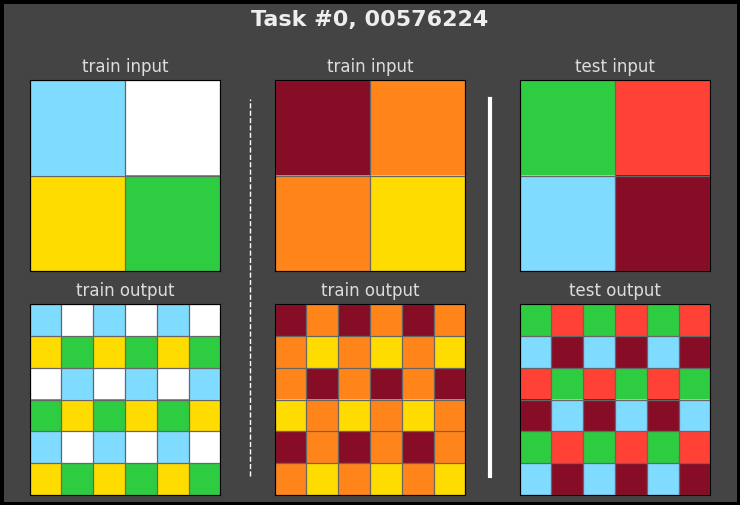

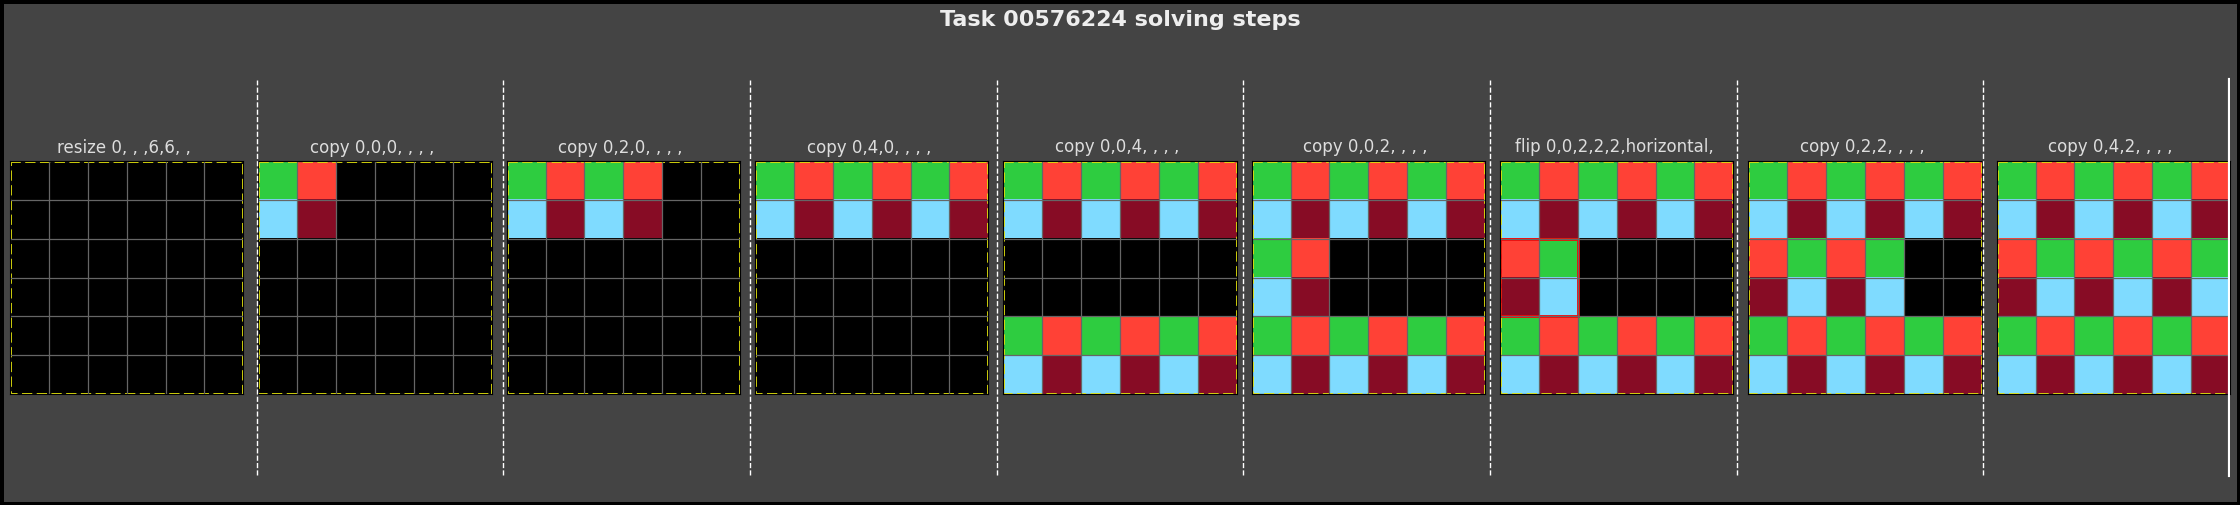

#1, 007bbfb7


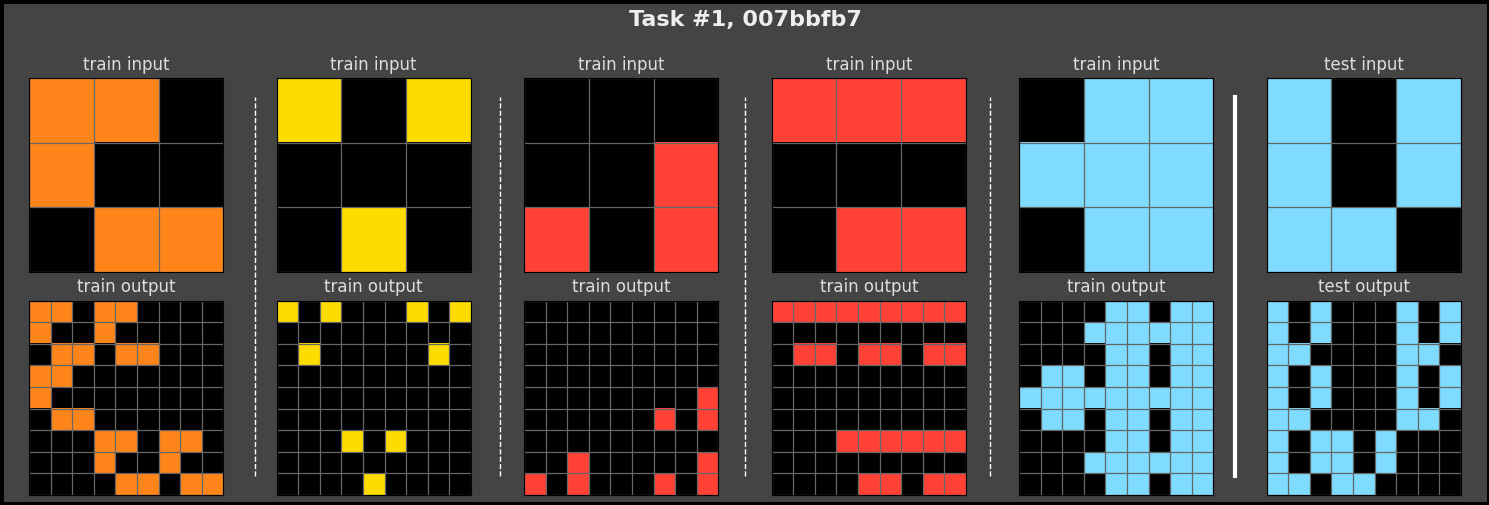

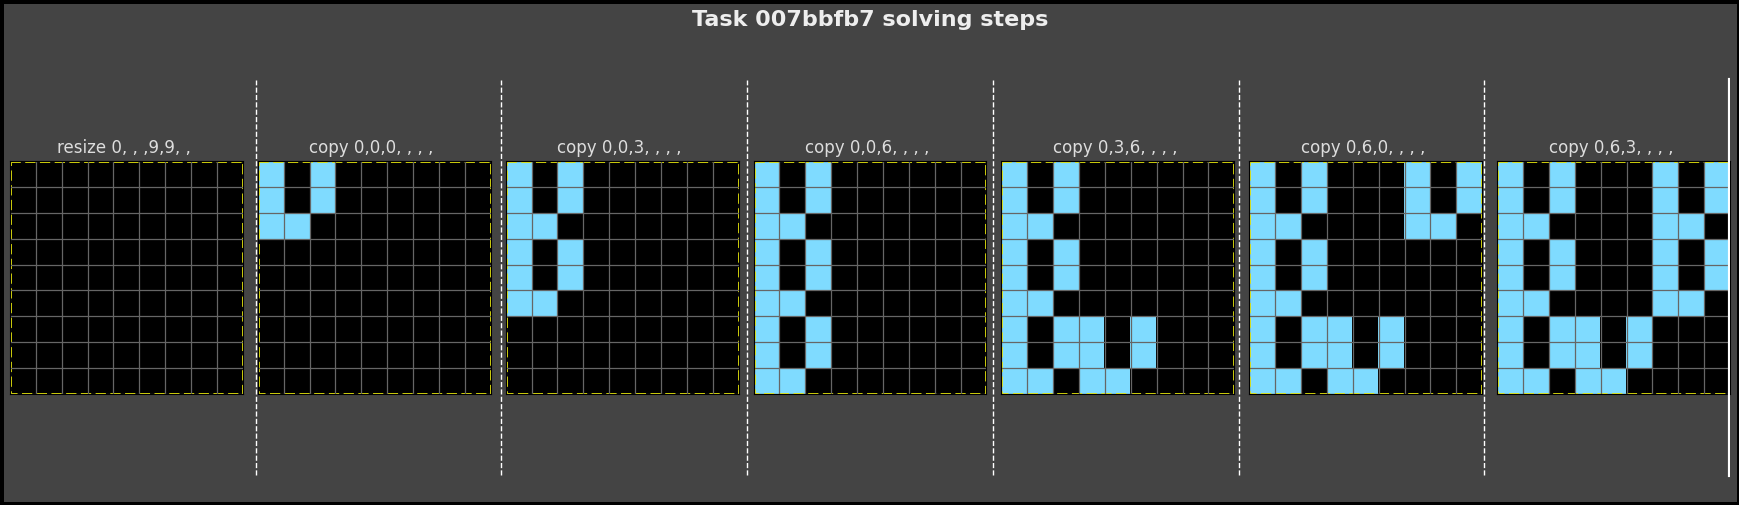

#2, 009d5c81


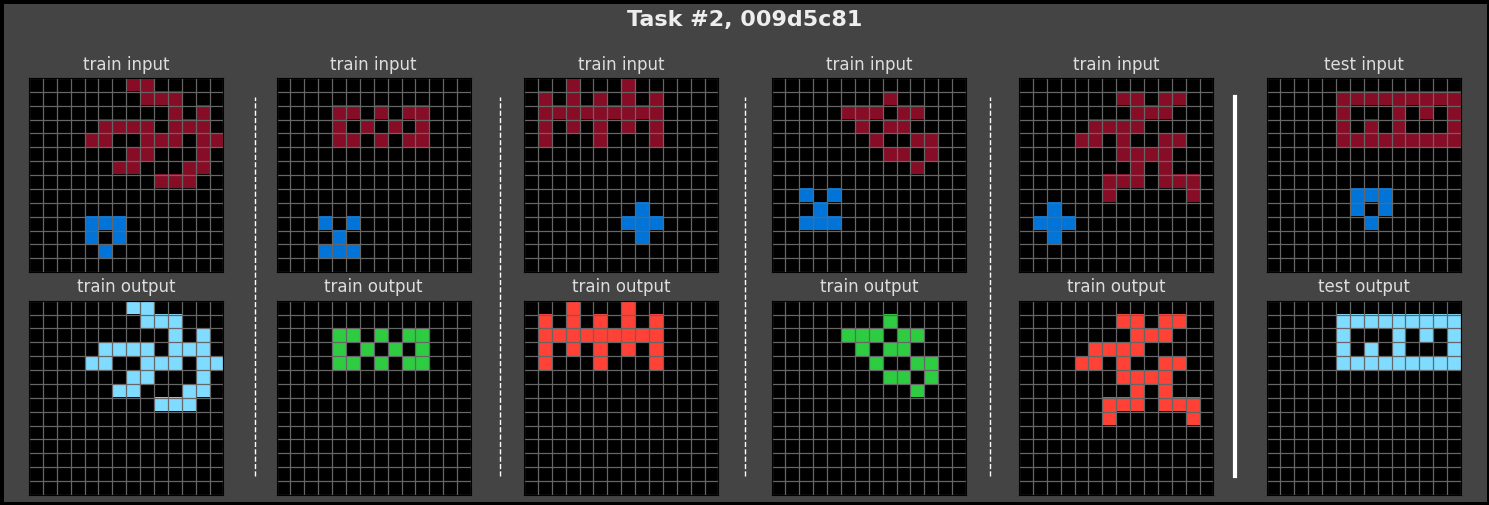

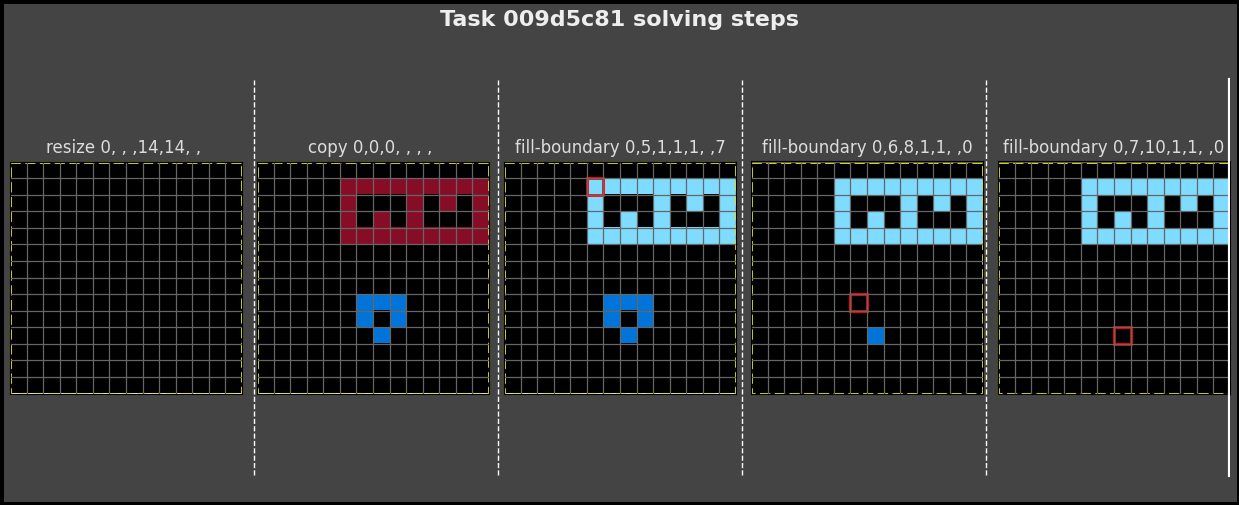

#3, 00d62c1b


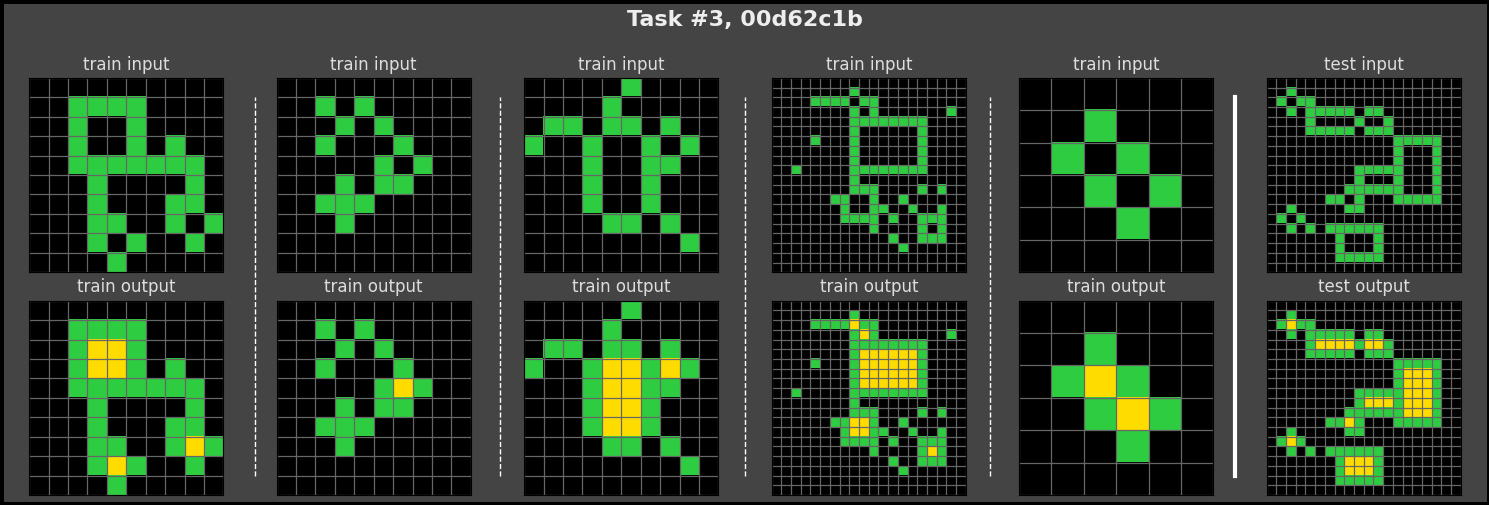

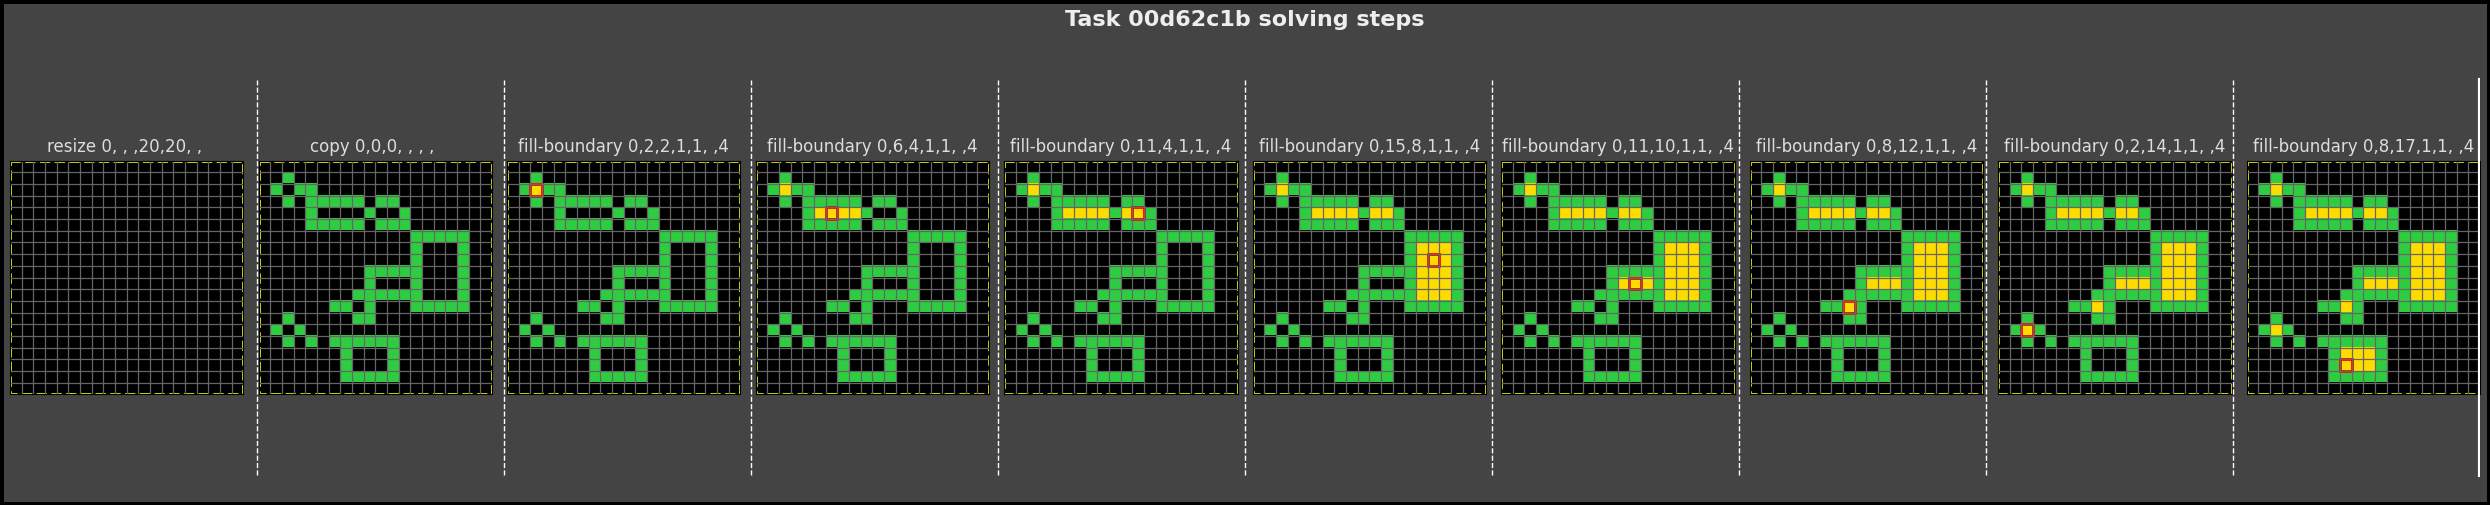

#4, 00dbd492


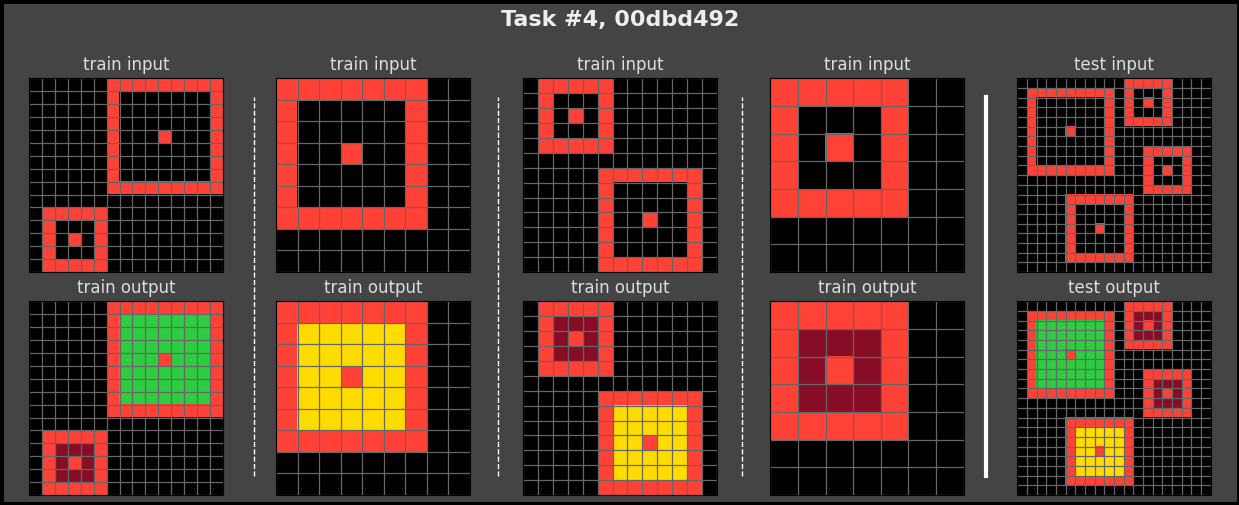

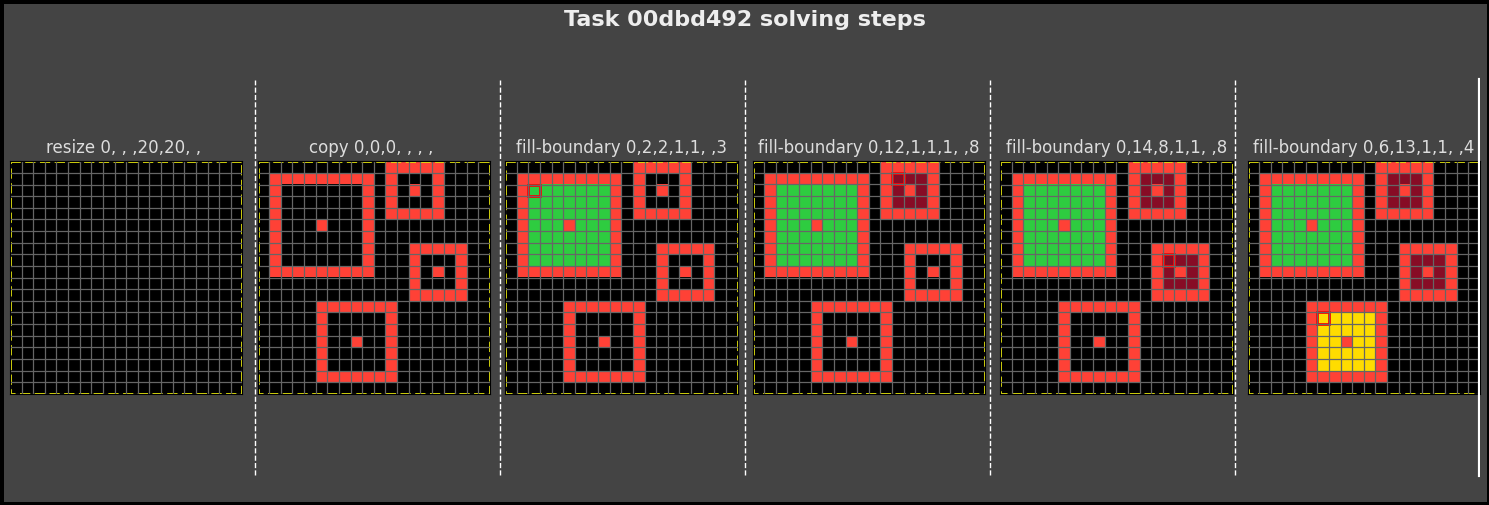

#5, 017c7c7b


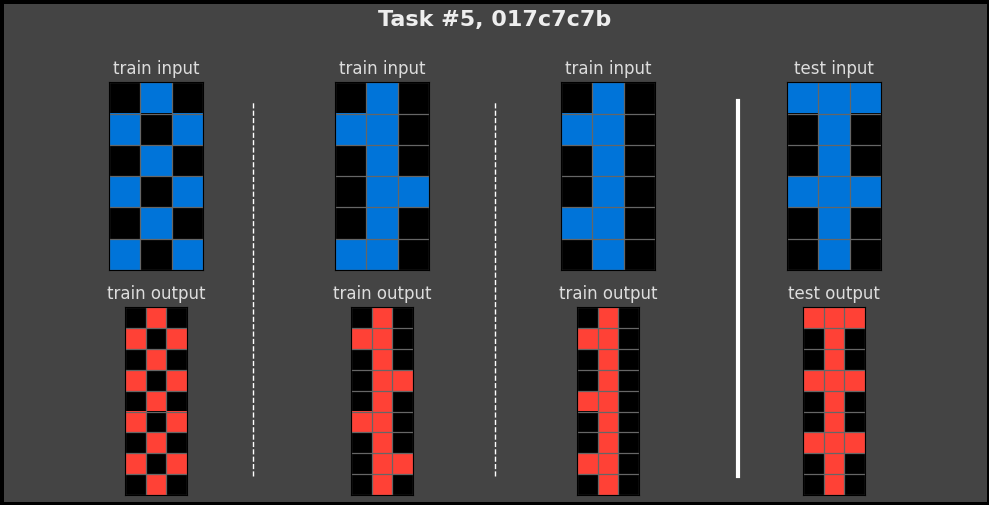

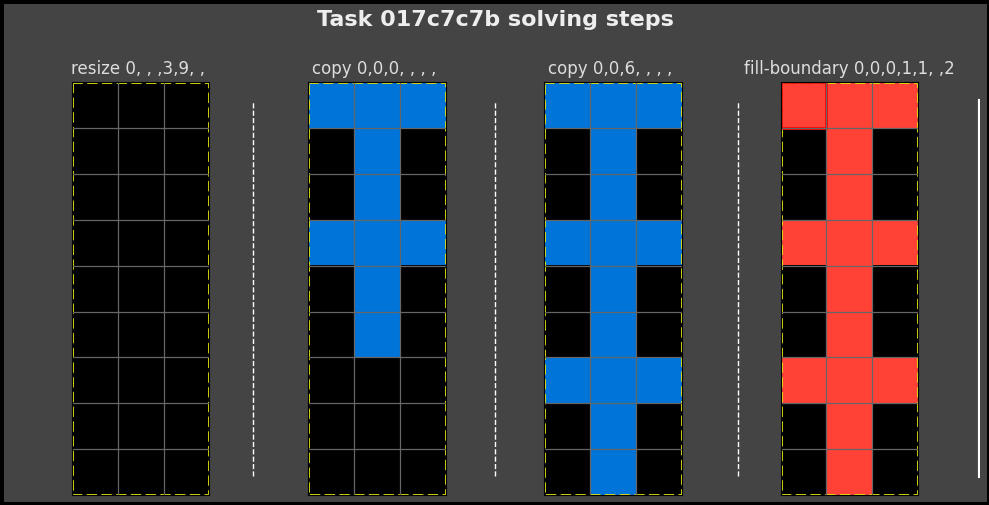

#6, 025d127b


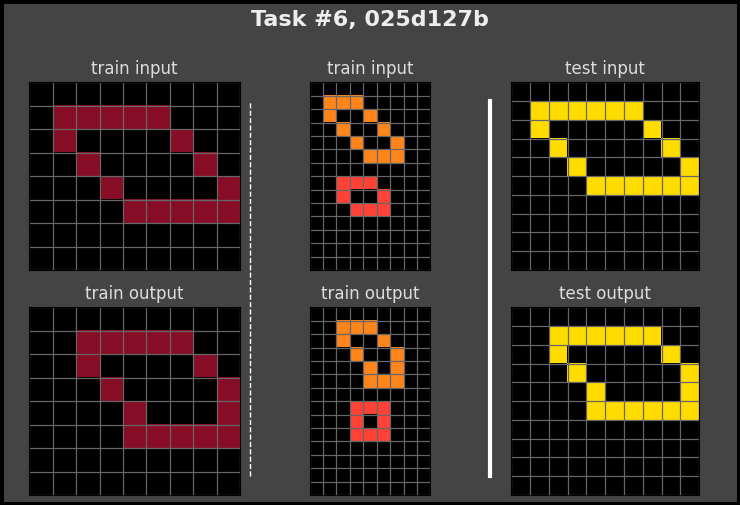

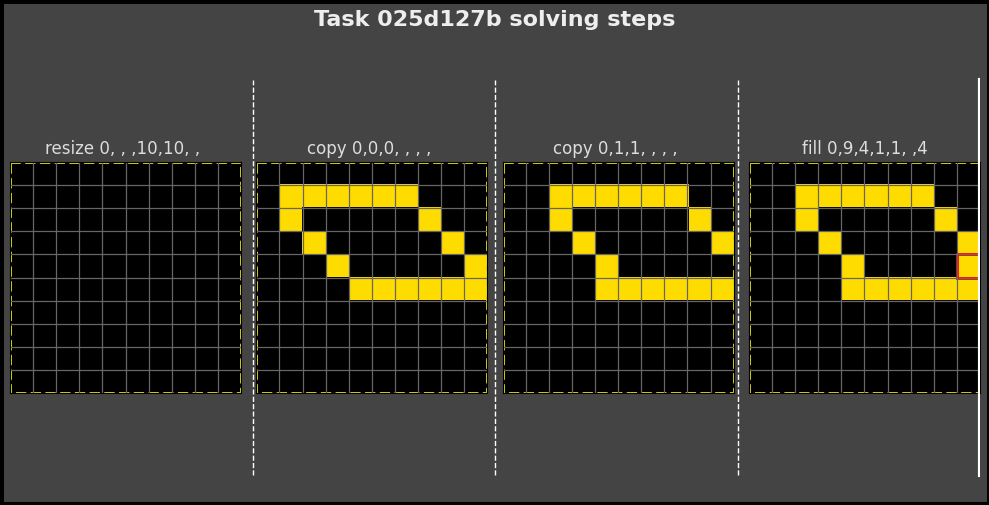

#7, 03560426


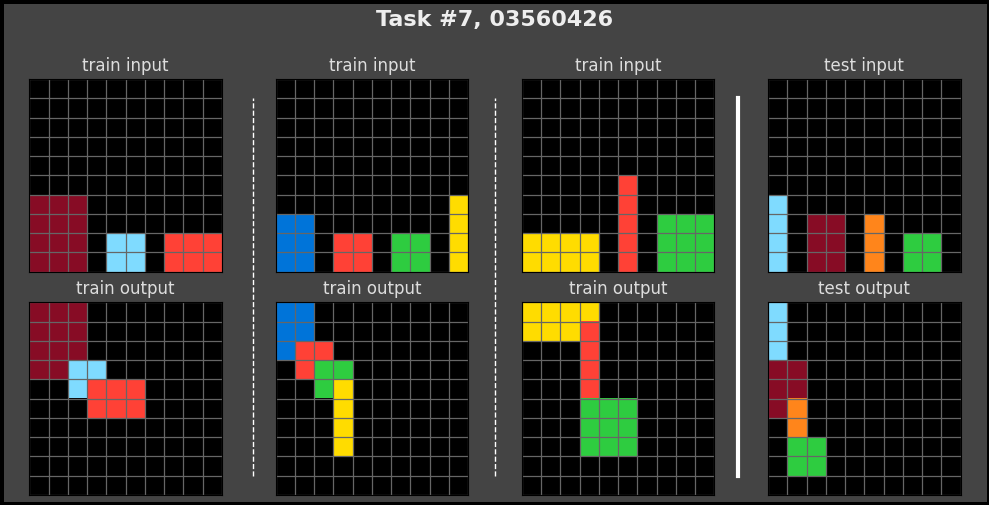

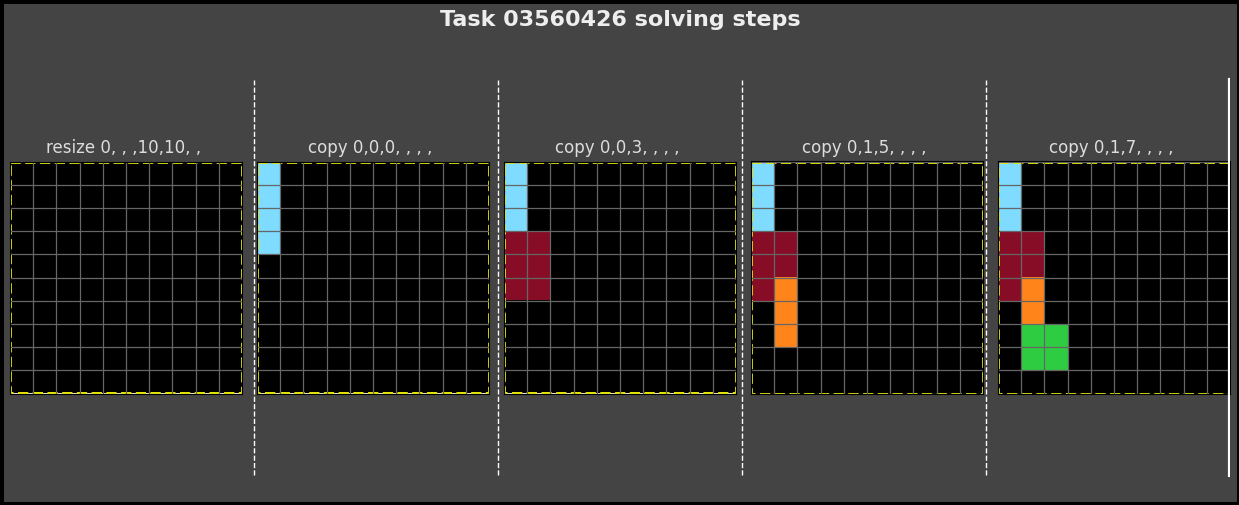

#8, 045e512c


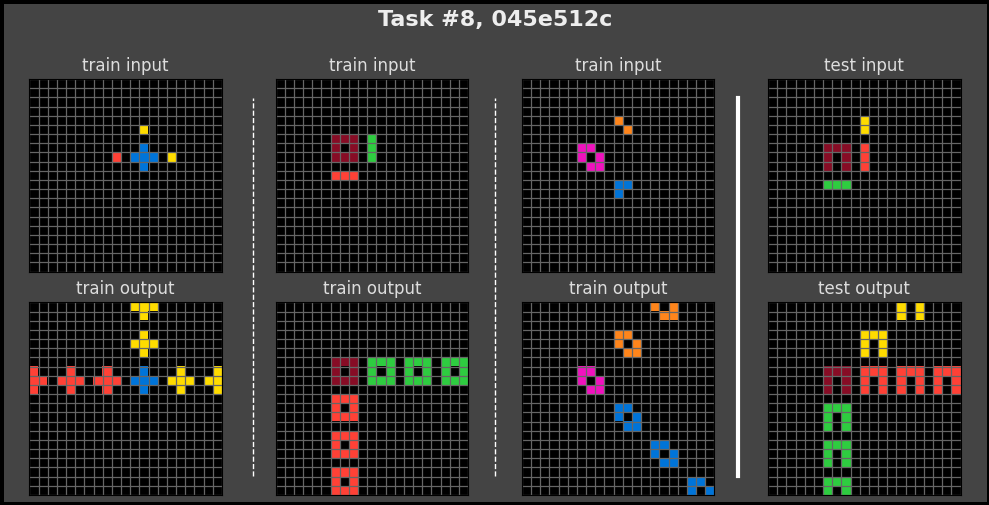

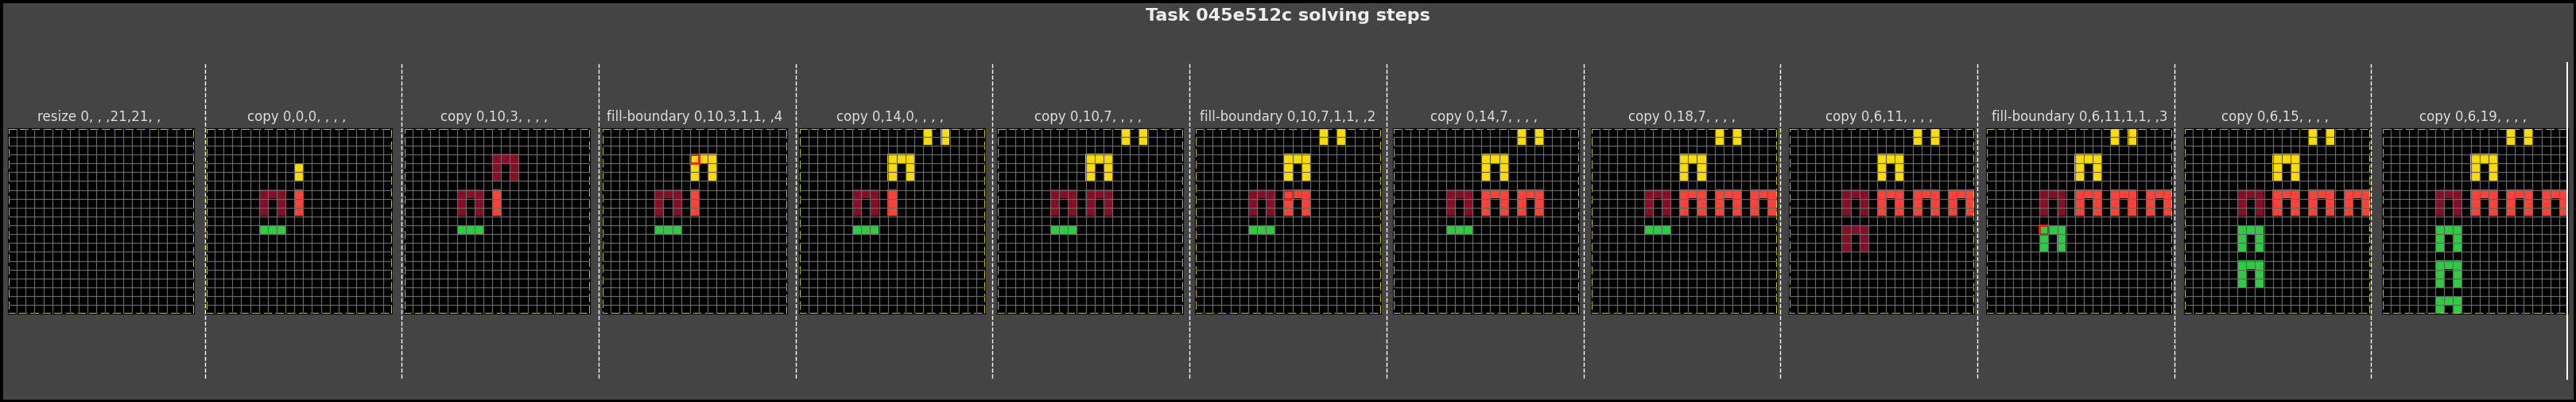

#9, 0520fde7


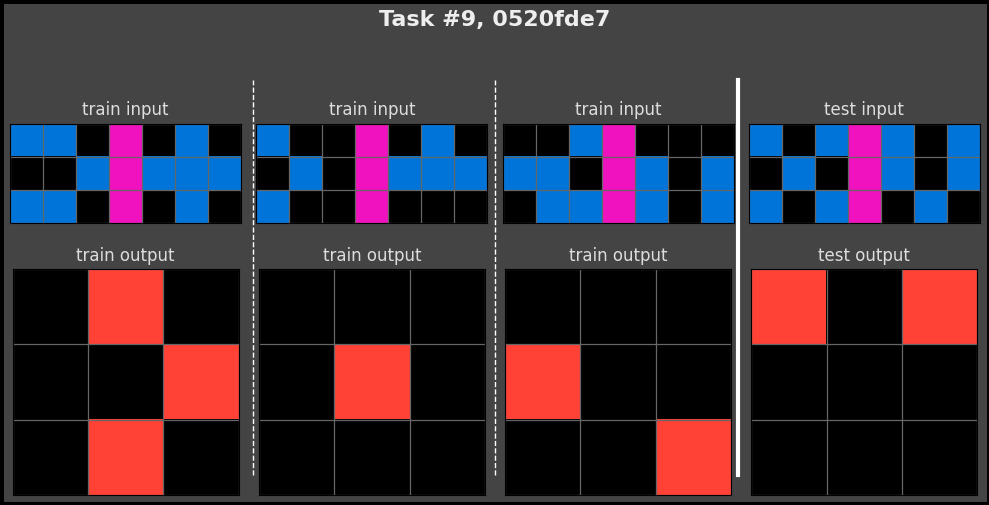

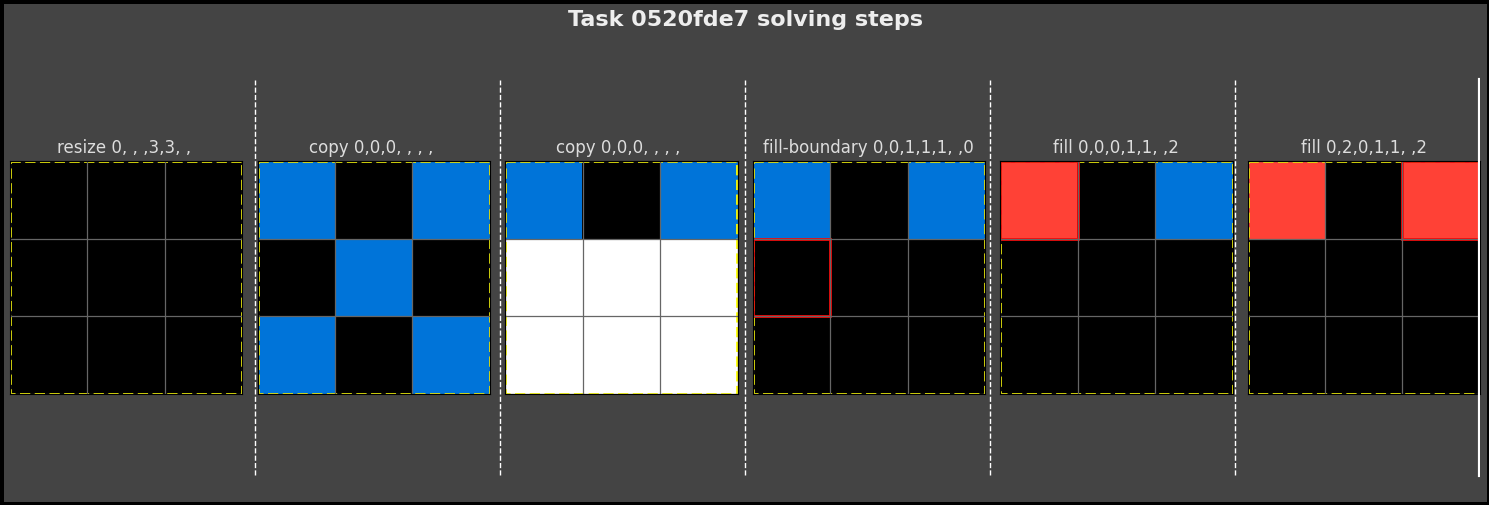

#46, 13713586


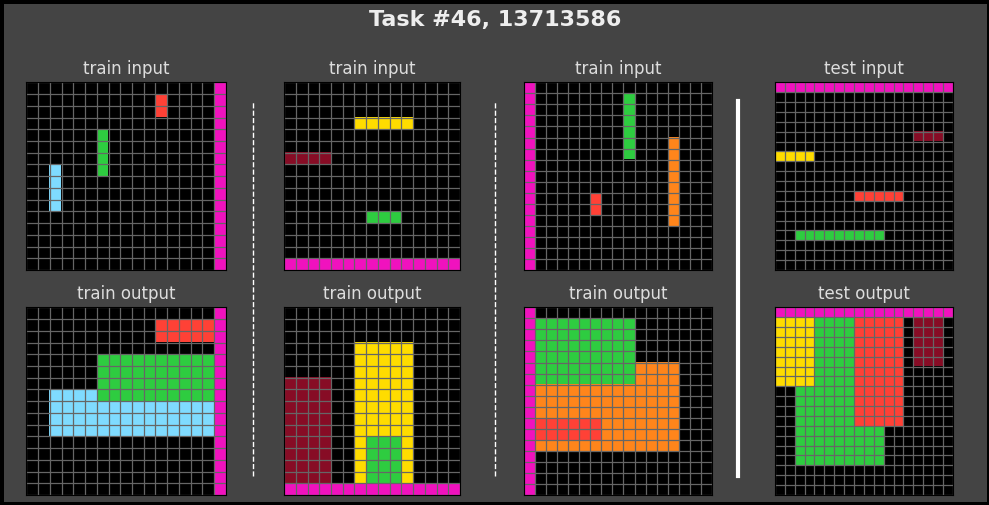

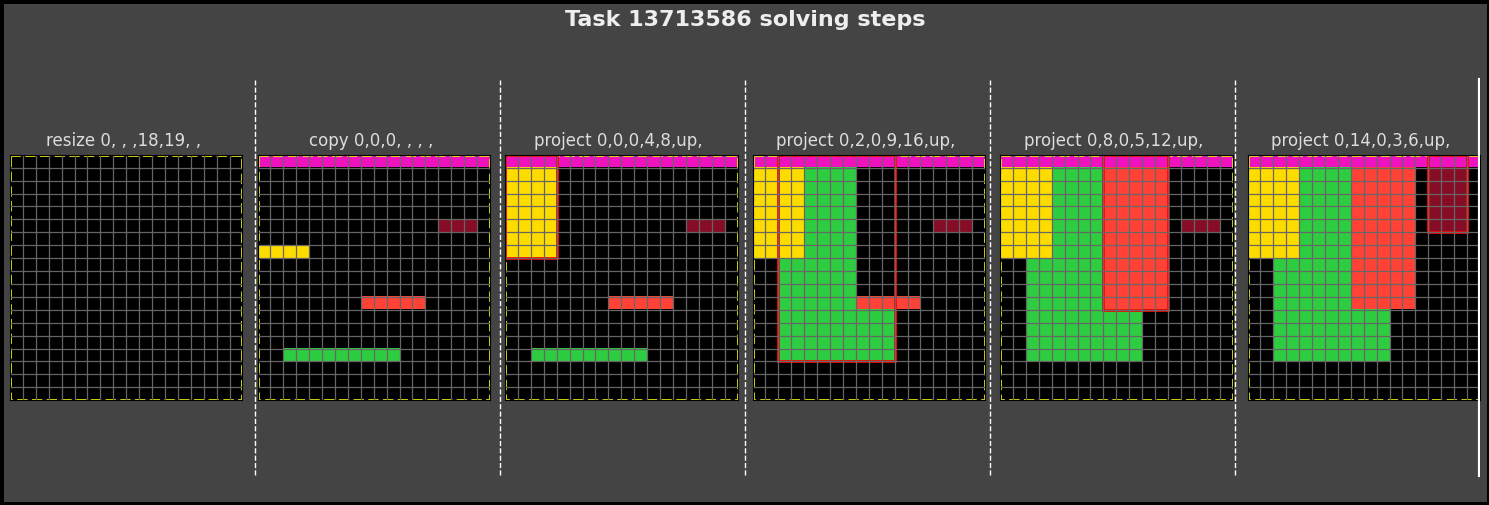

#58, 15696249


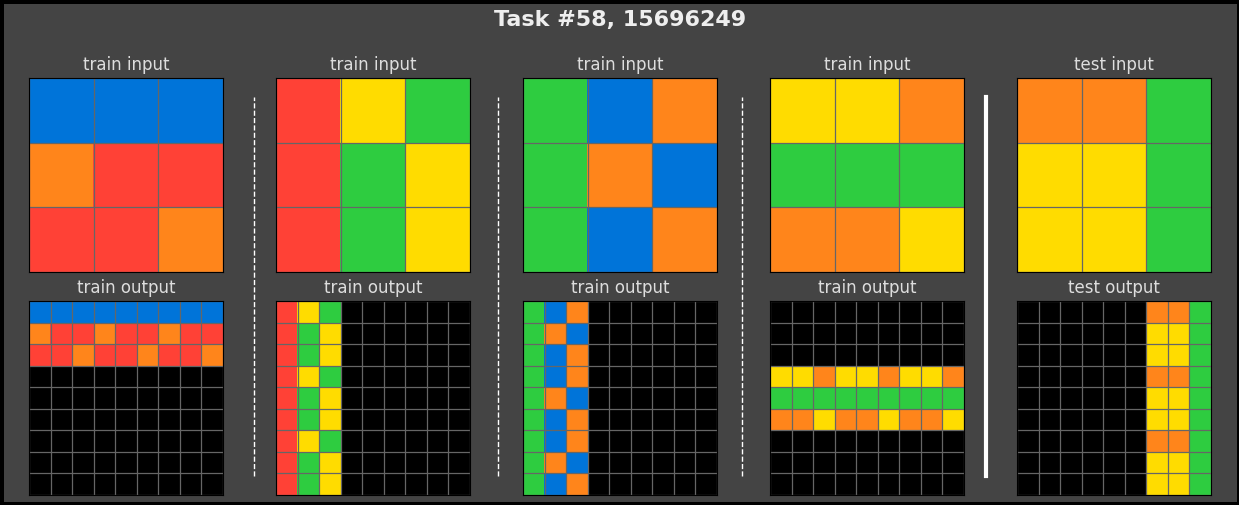

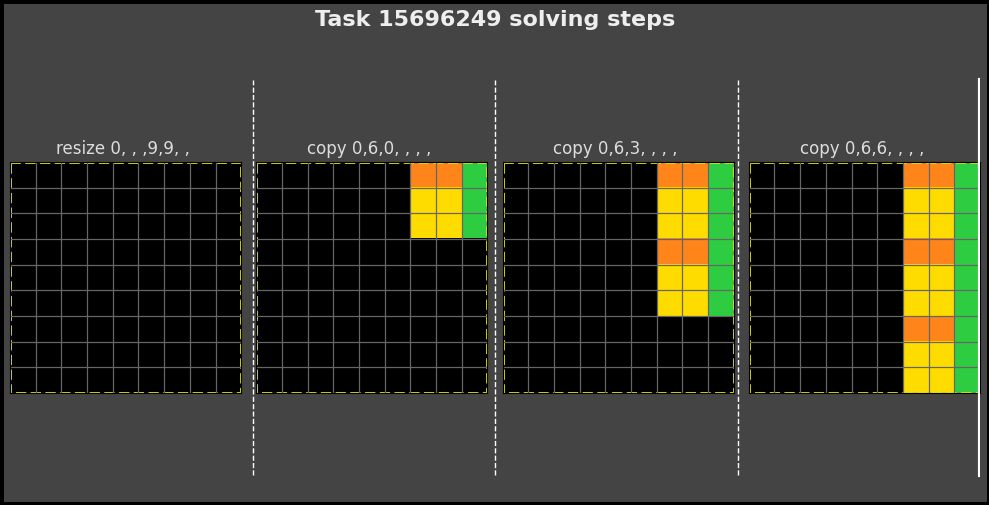

#112, 22168020


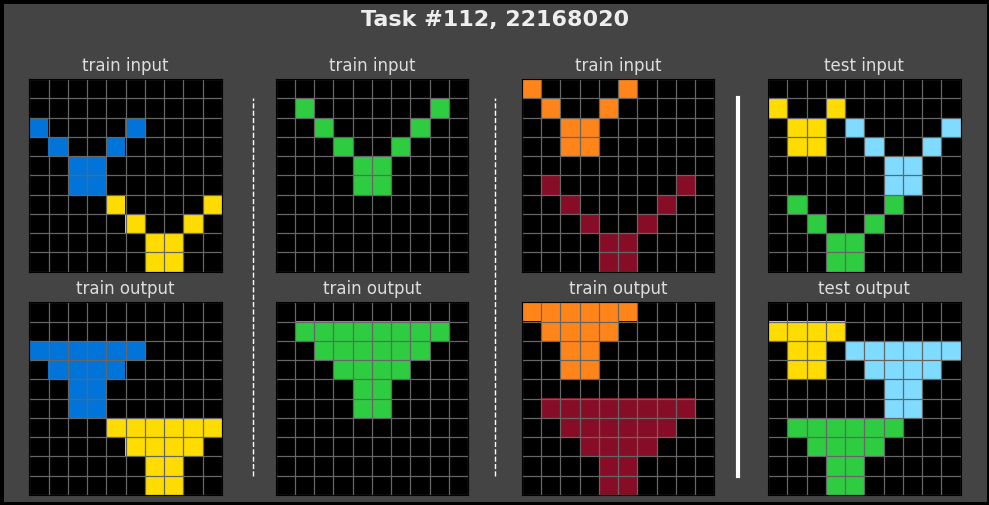

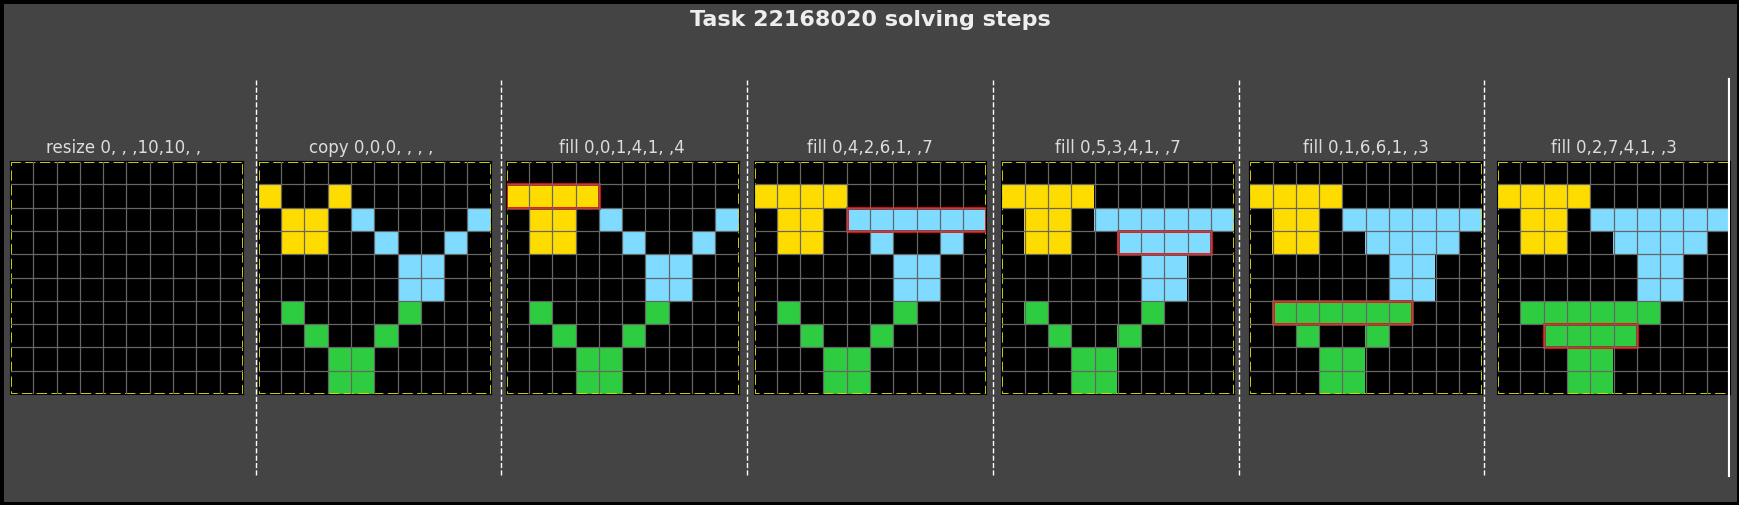

#123, 23581191


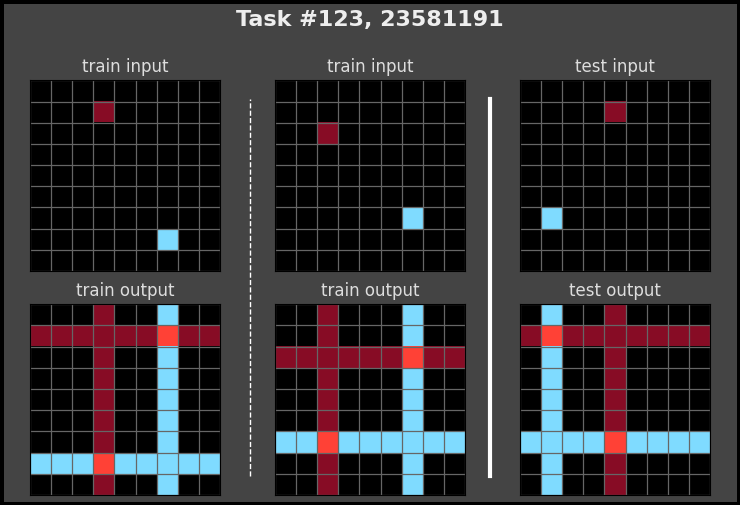

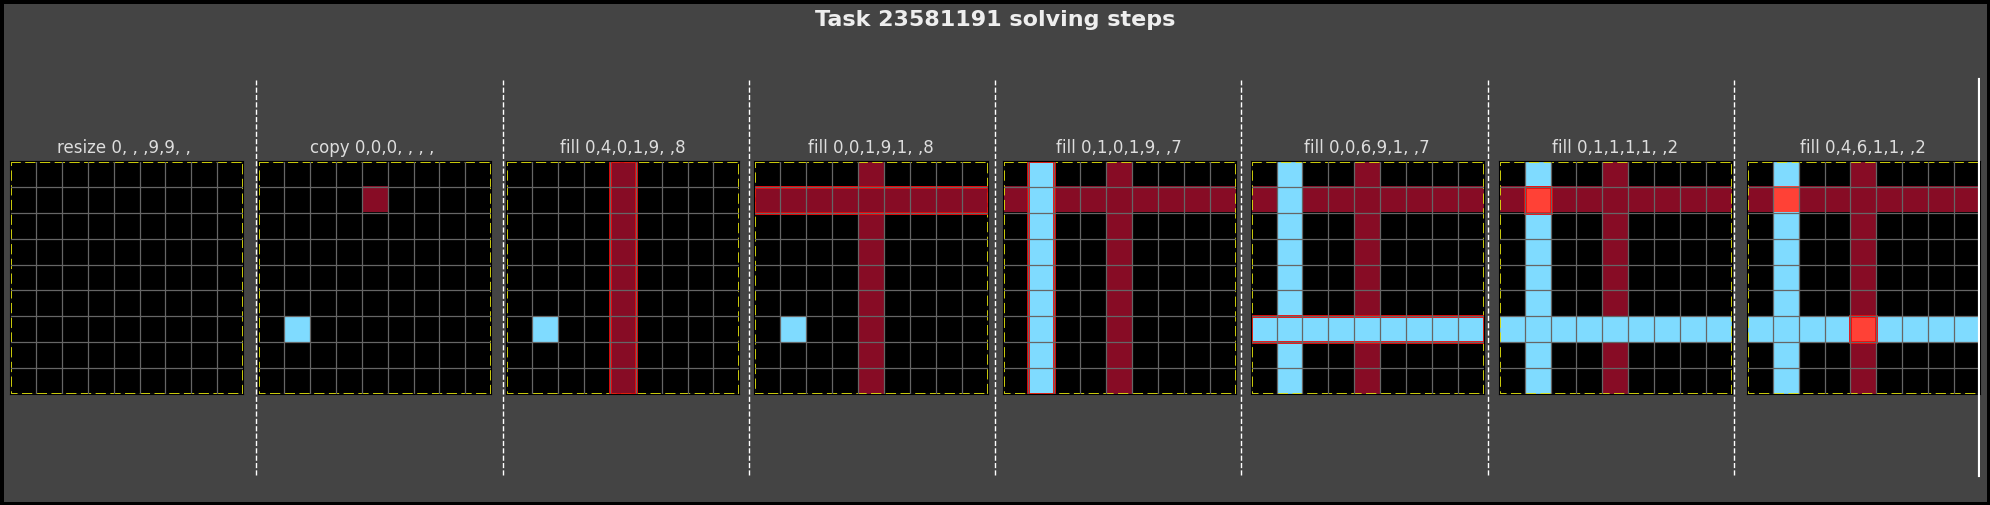

#150, 29623171


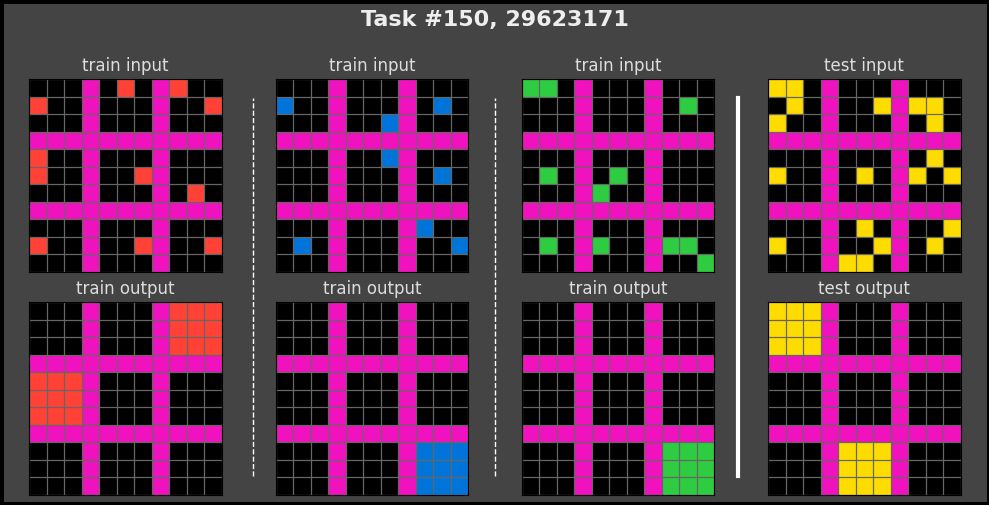

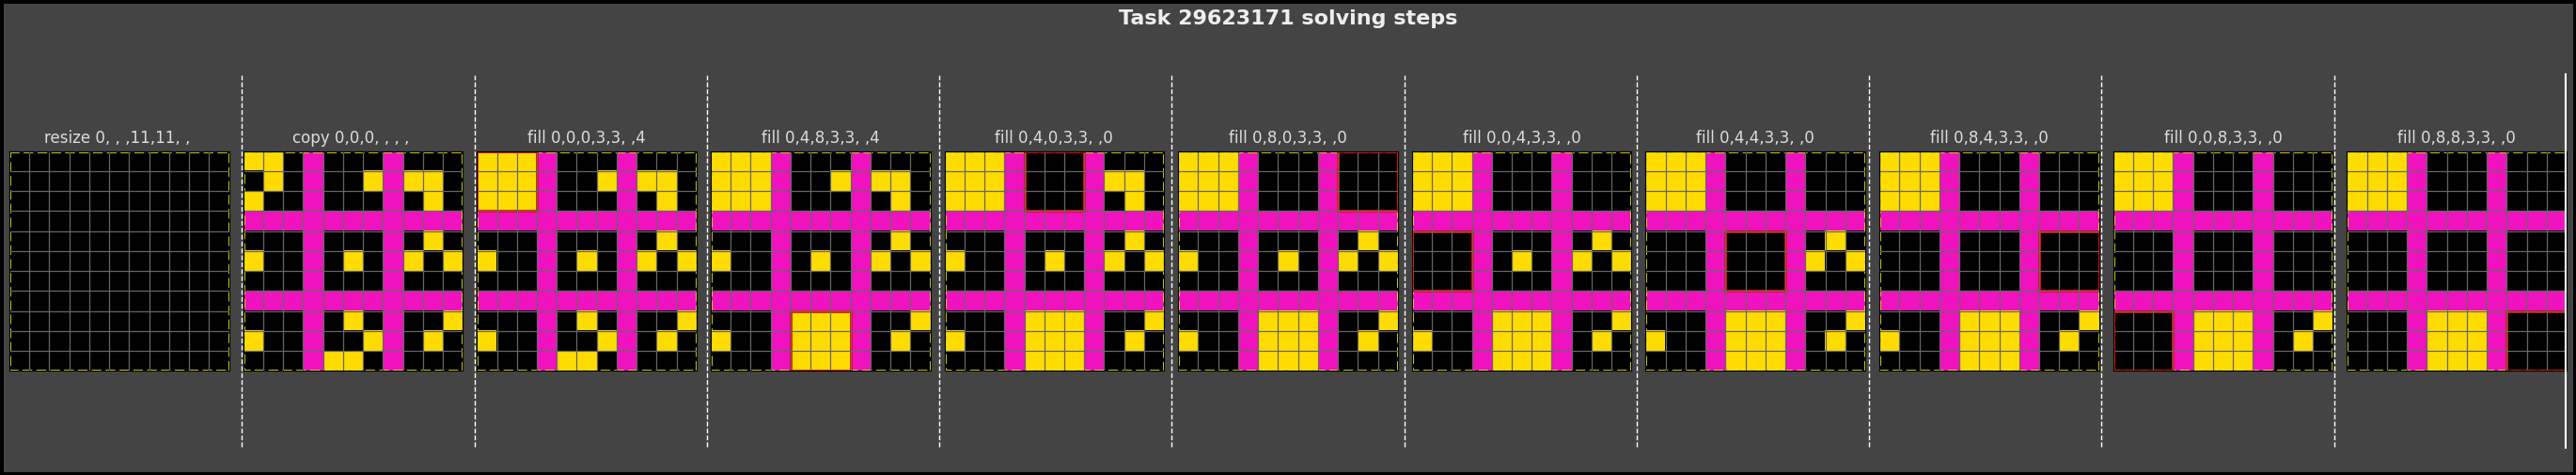

#151, 29700607


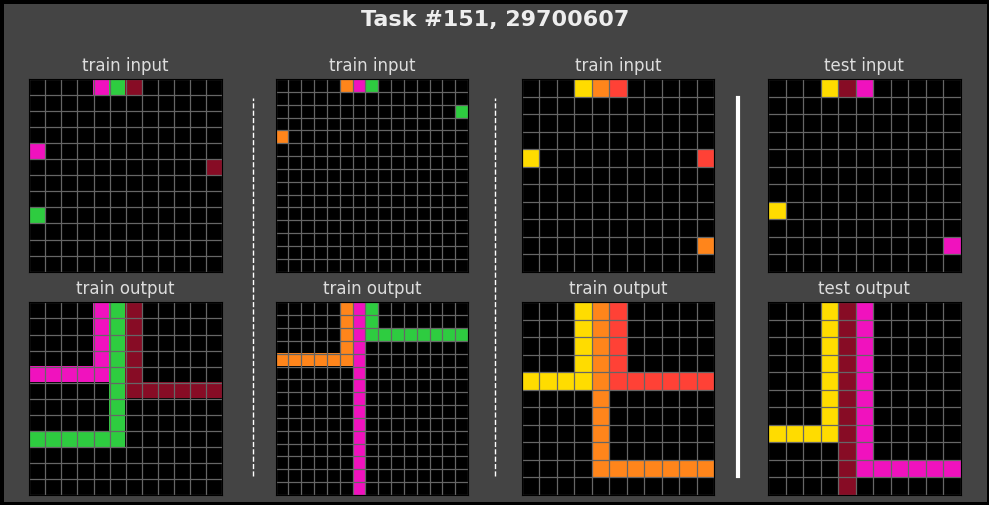

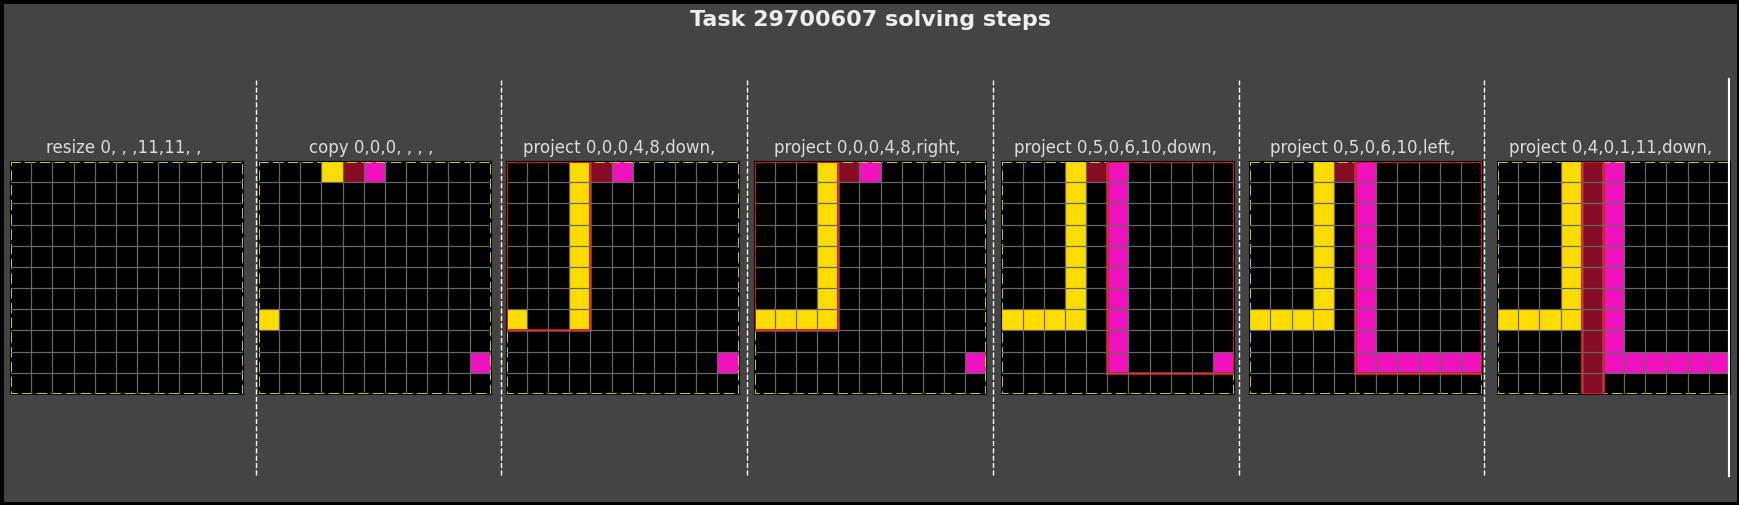

#181, 32597951


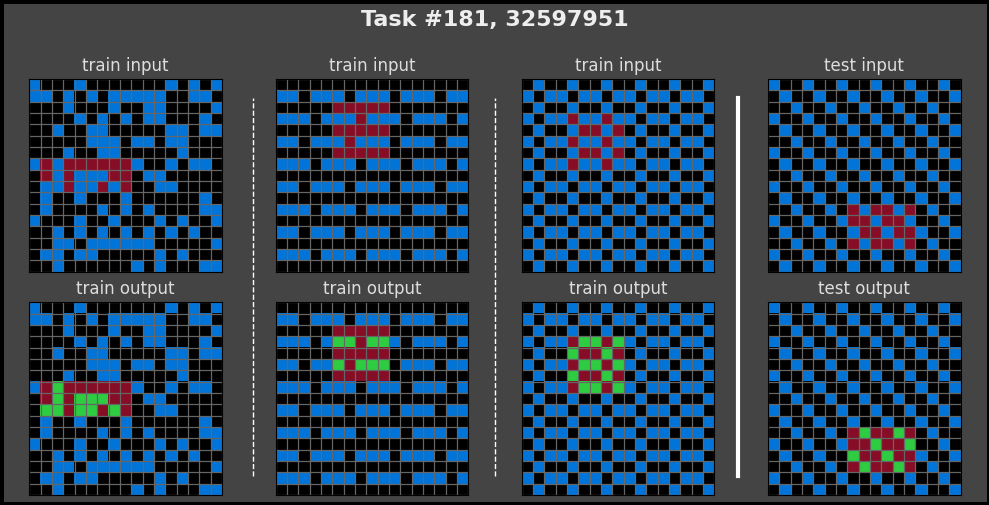

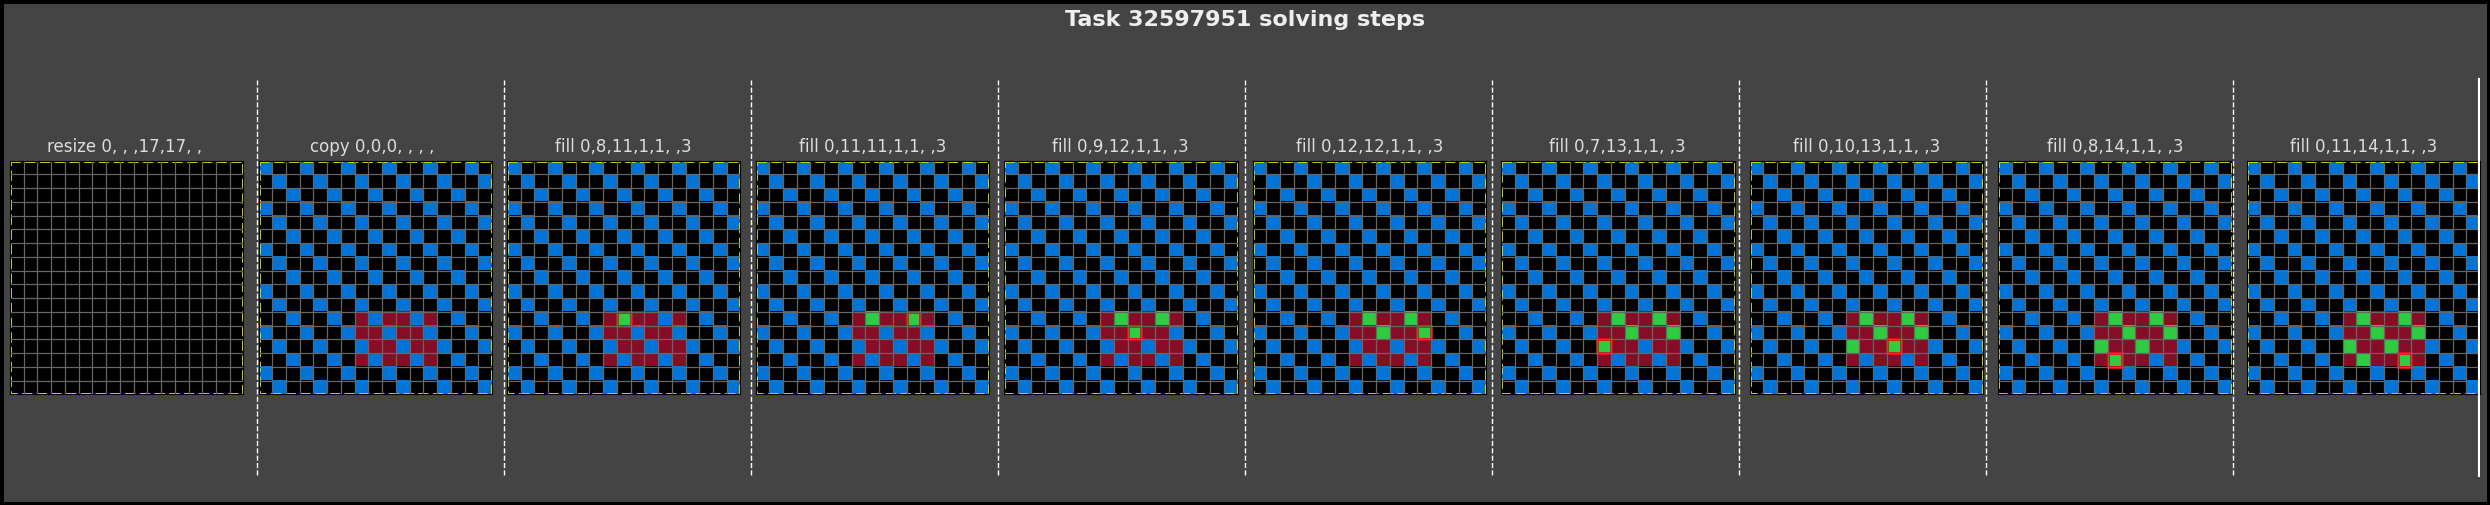

#239, 42918530


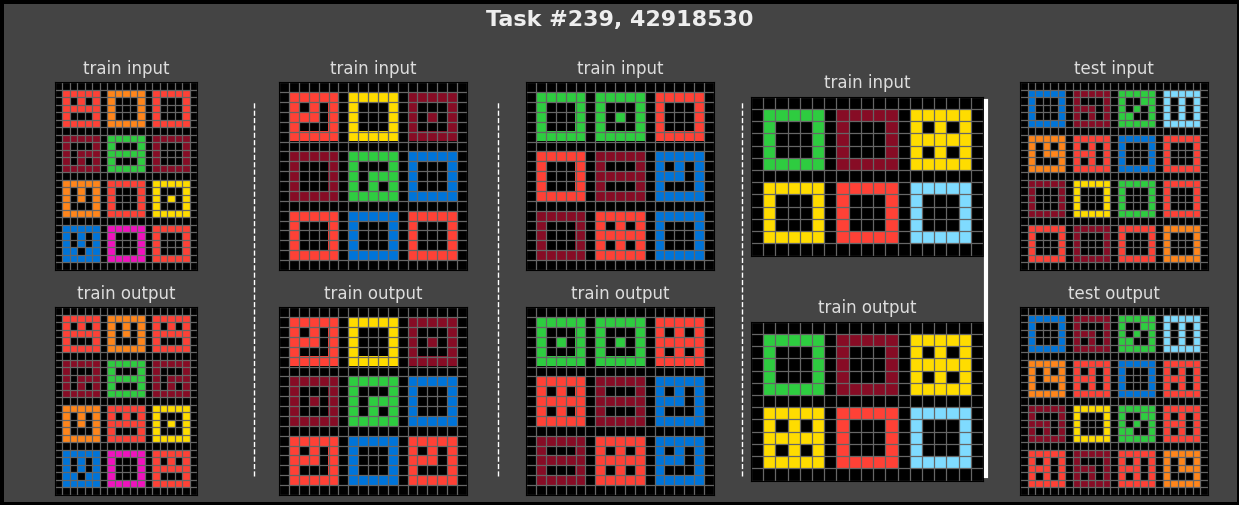

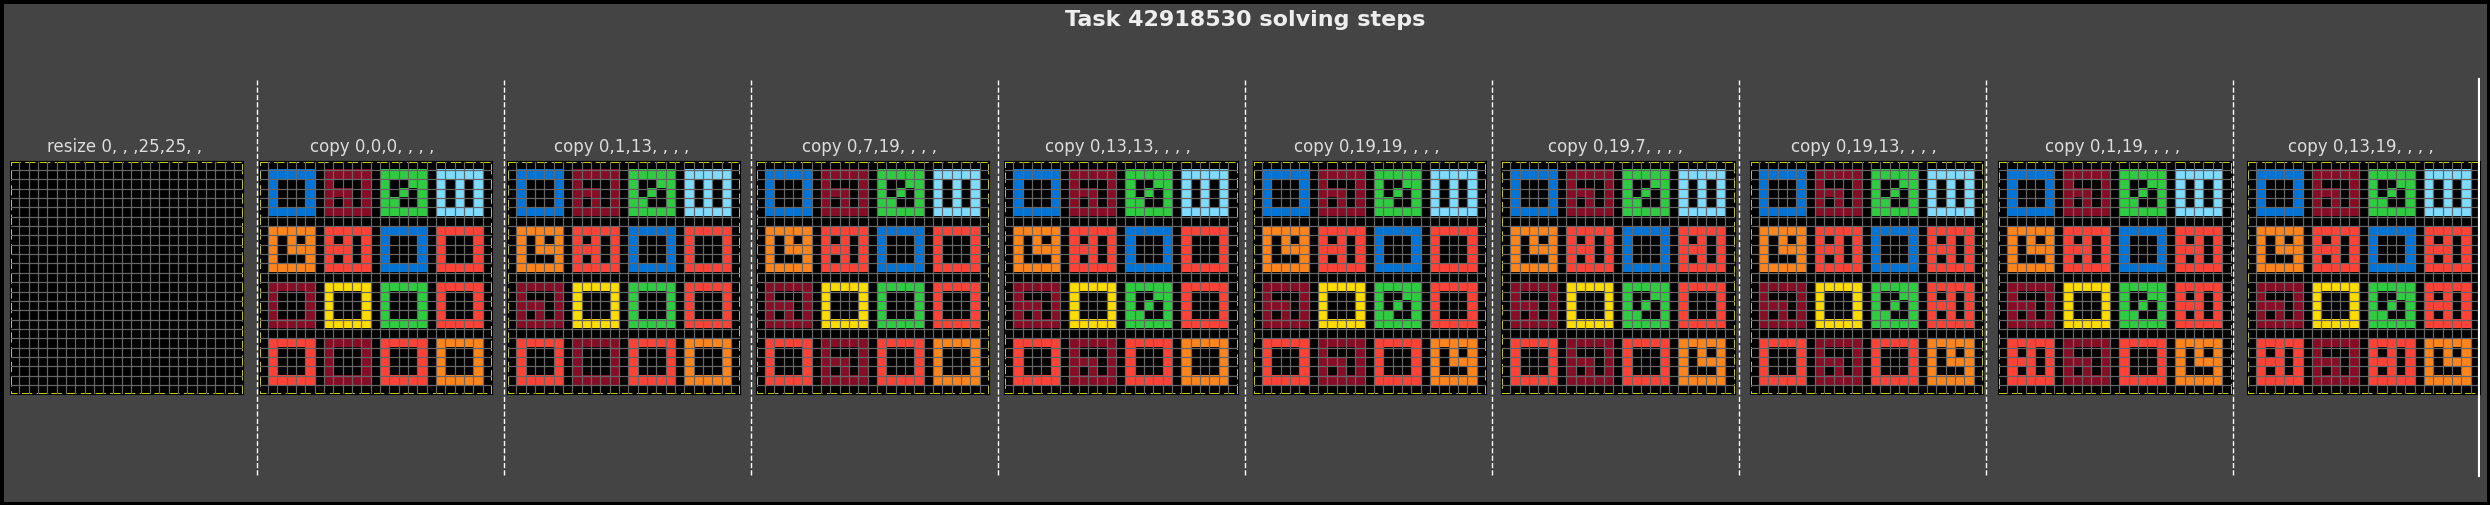

#253, 45737921


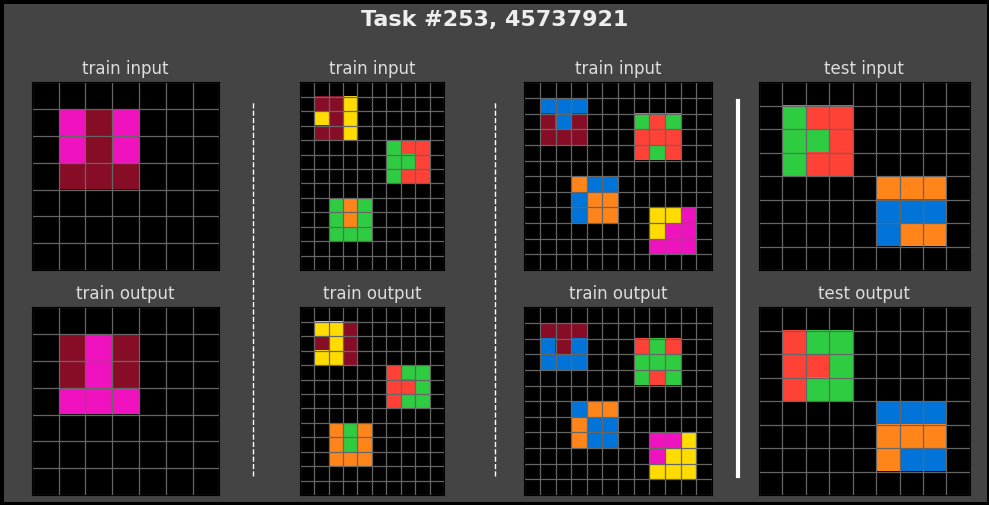

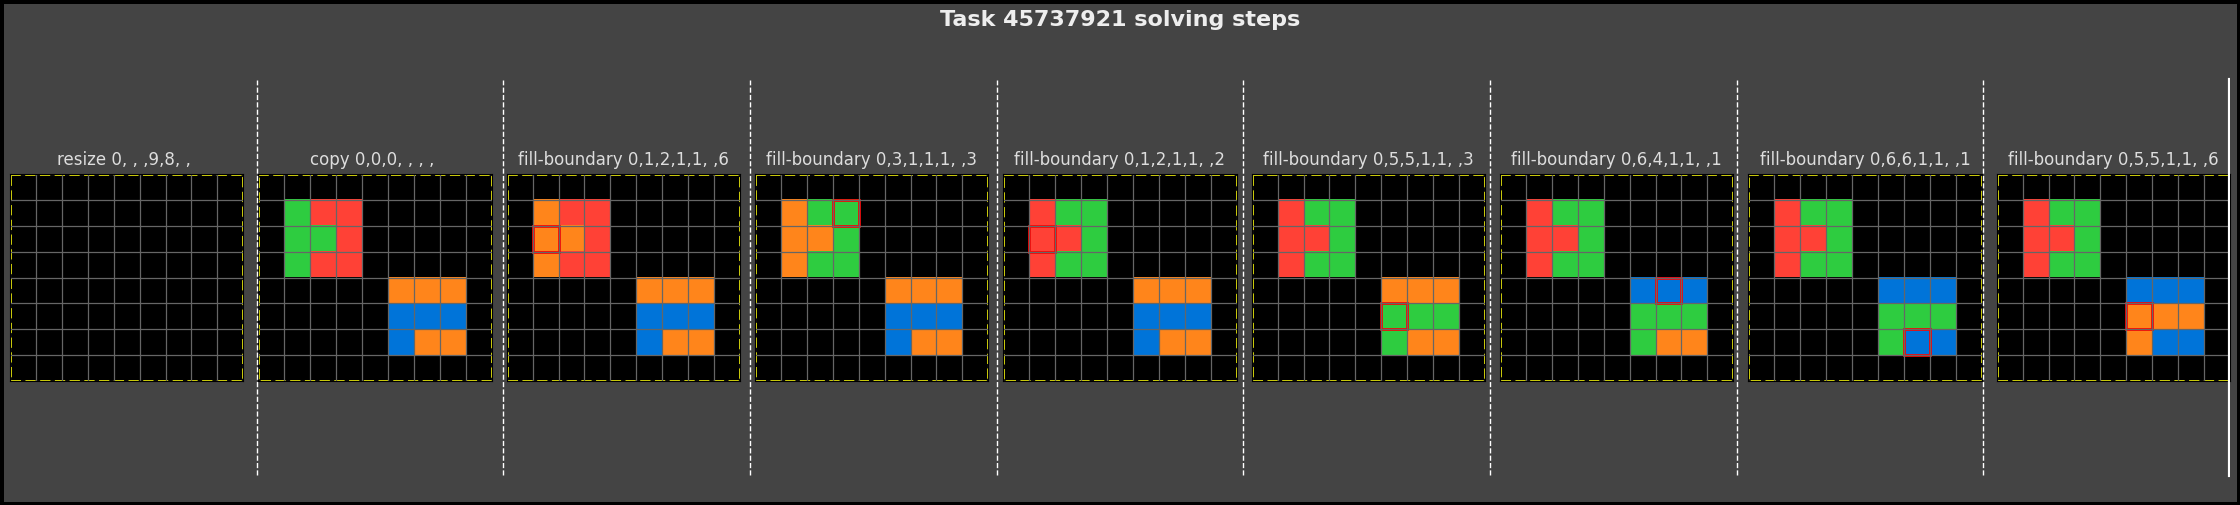

#291, 50846271


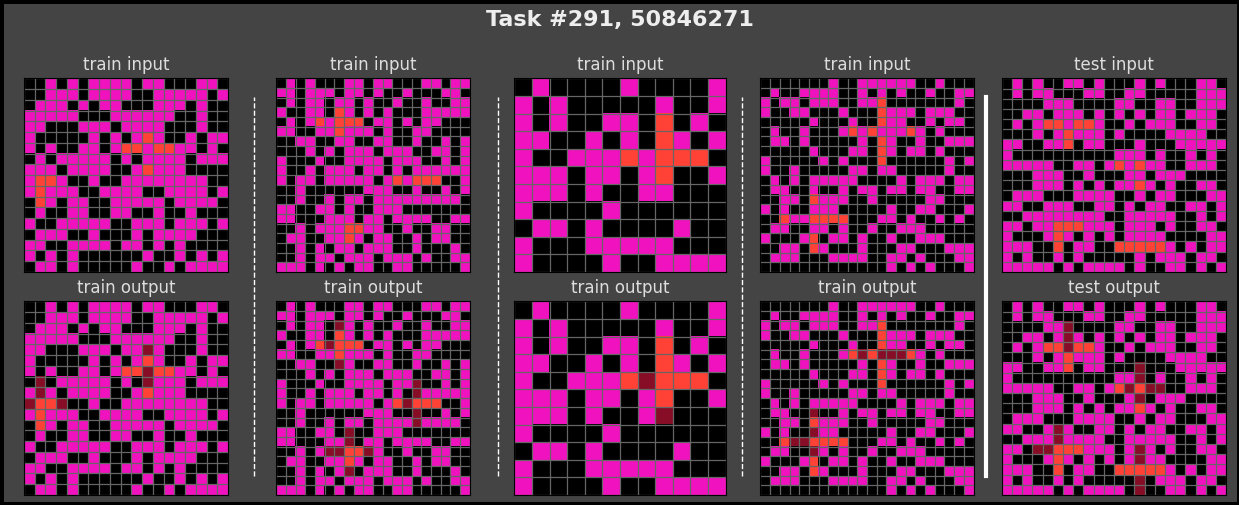

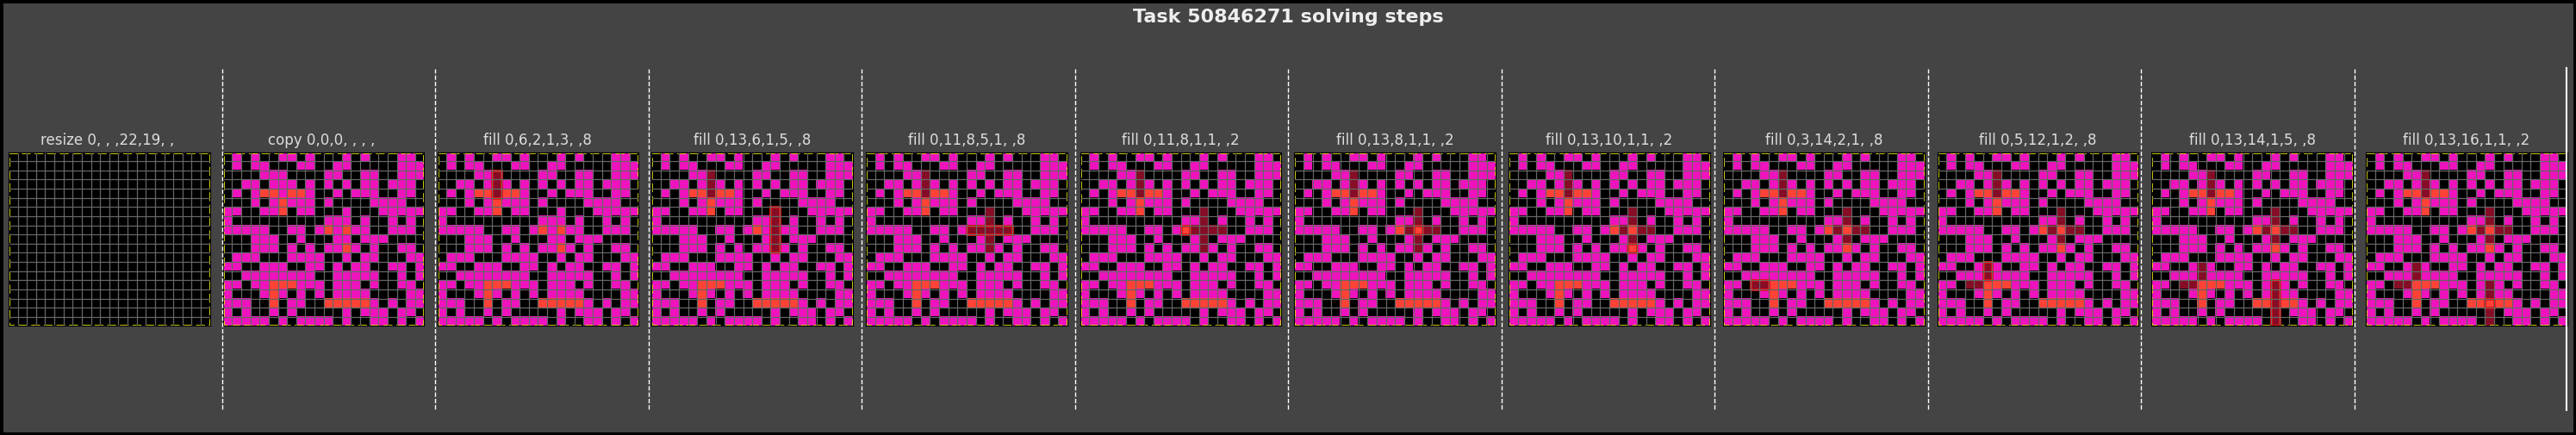

#315, 55059096


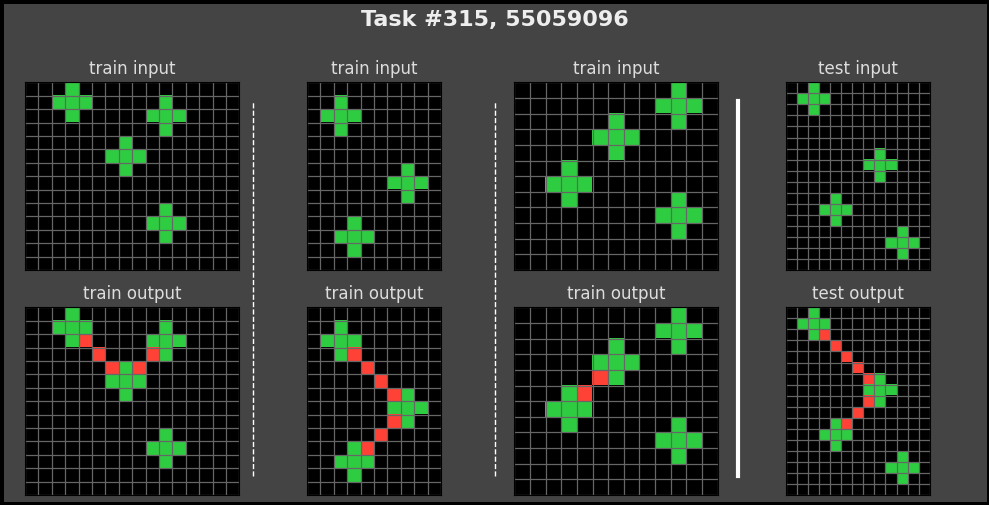

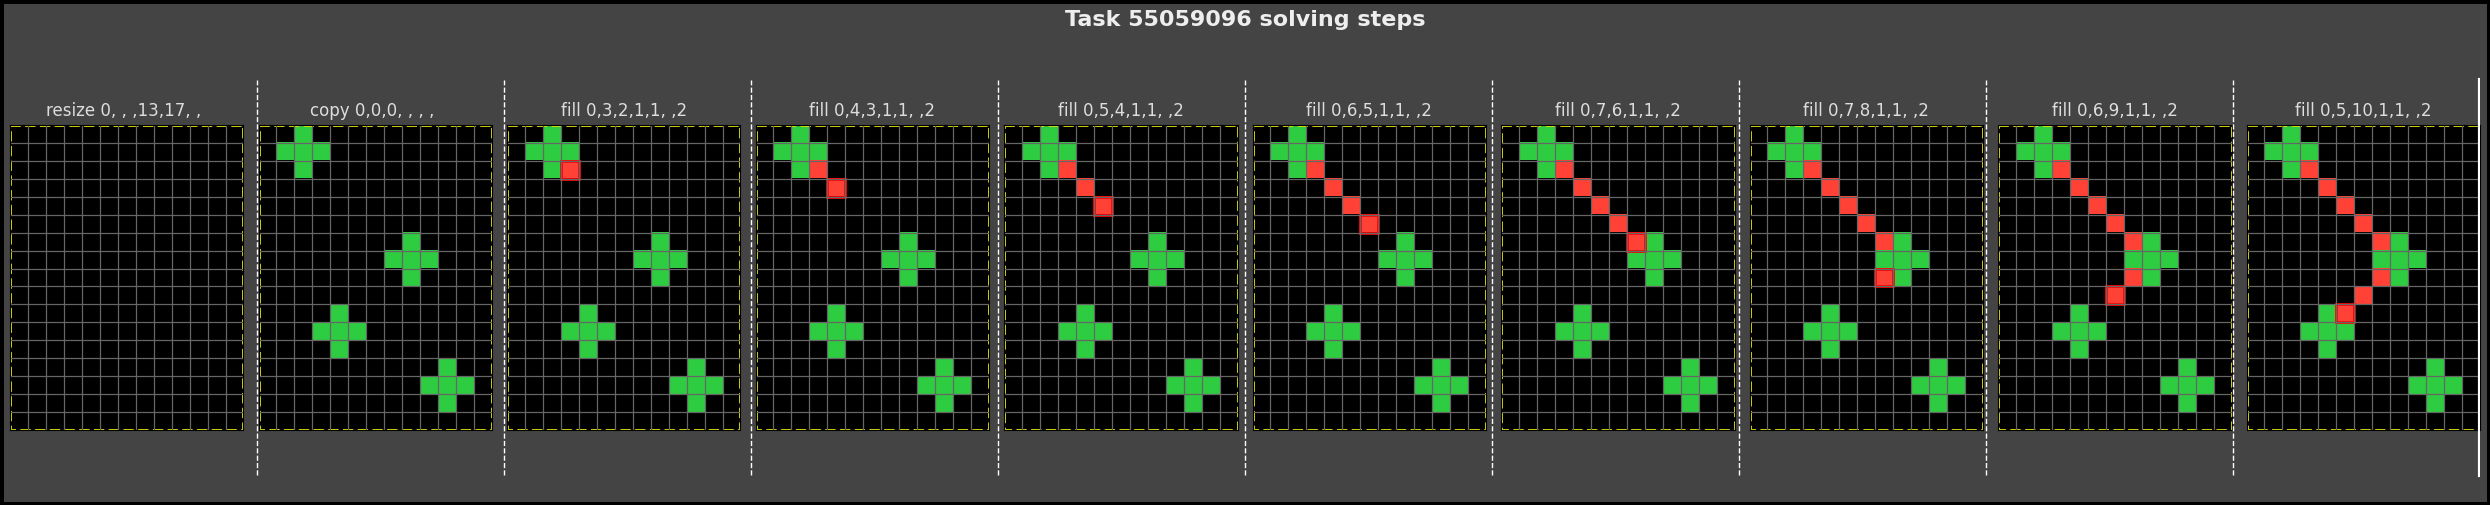

#334, 59341089


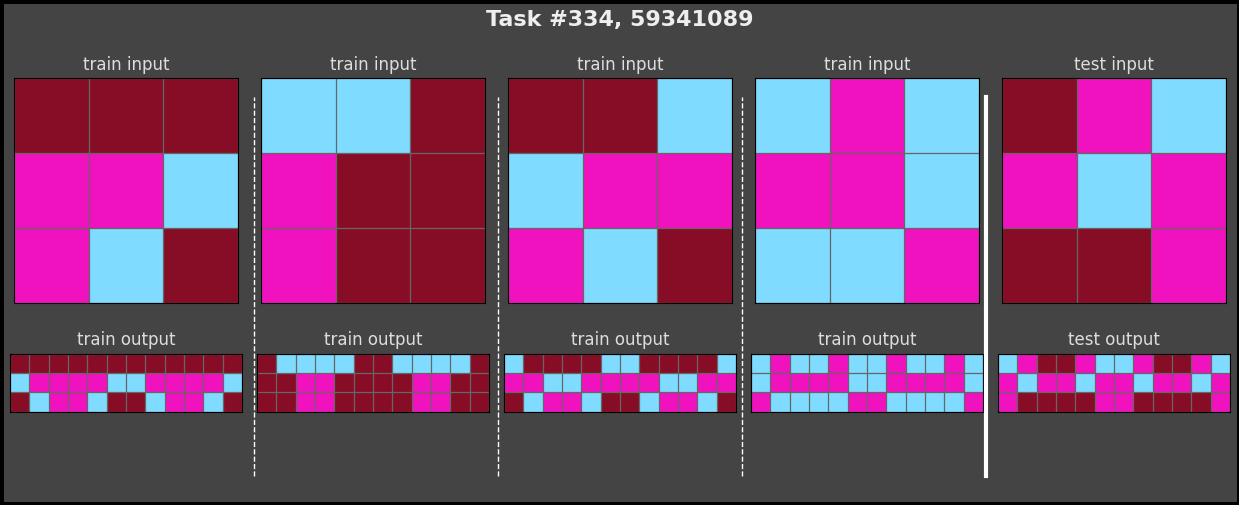

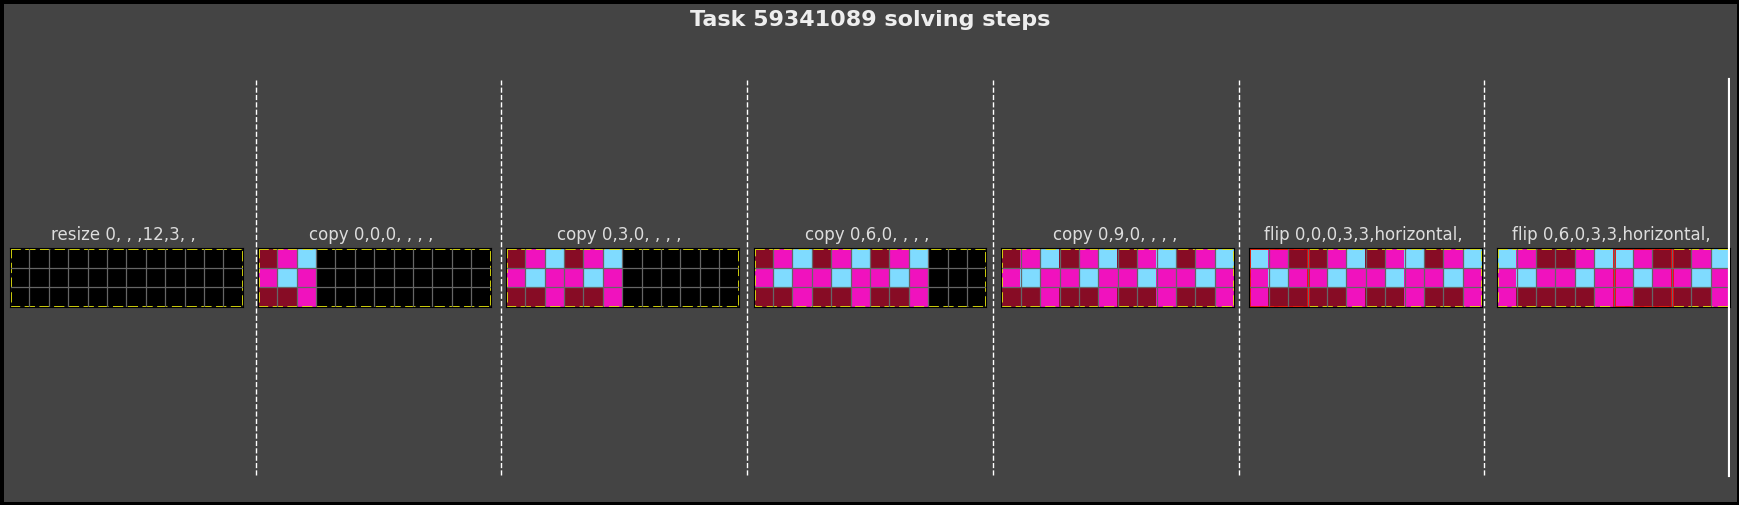

#366, 63613498


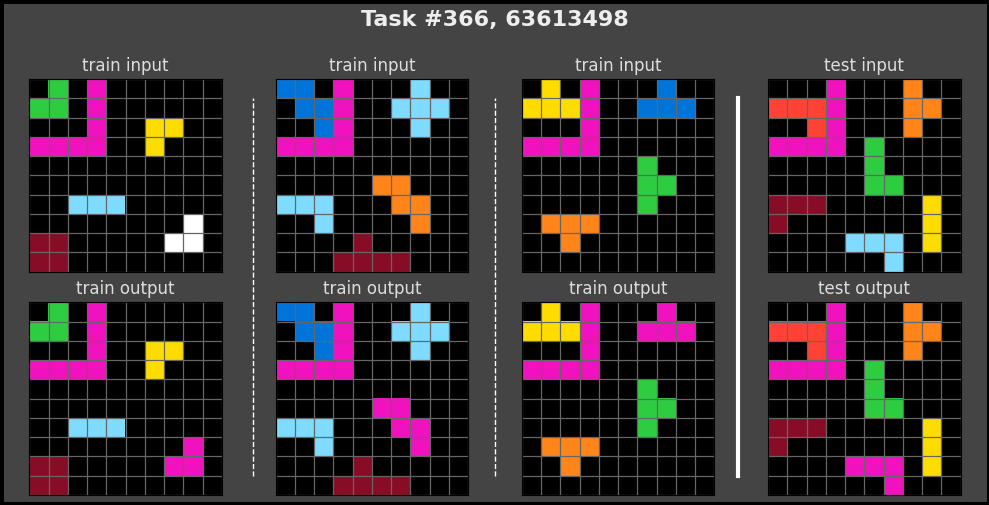

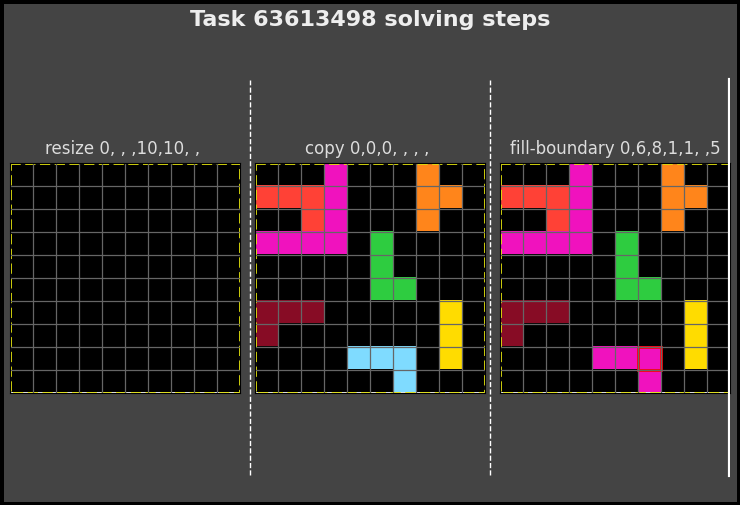

#432, 73182012


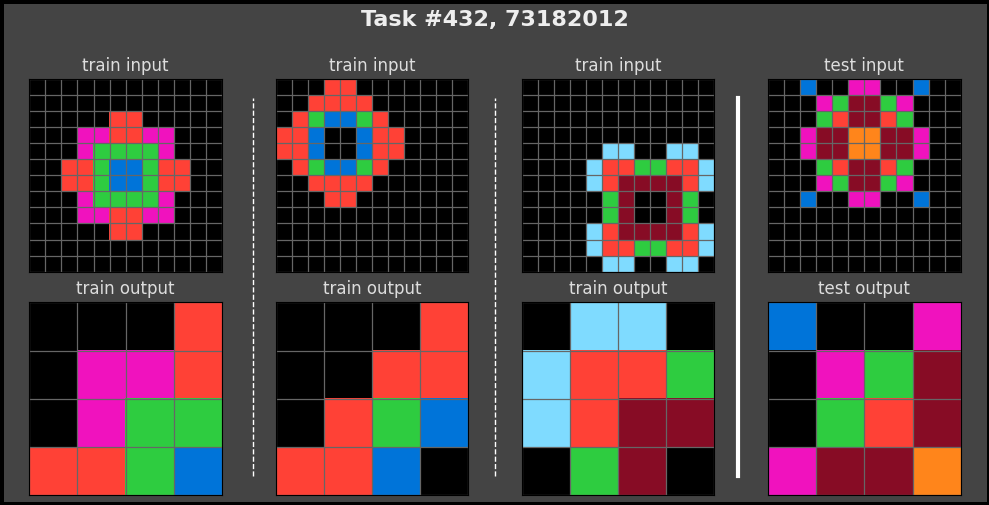

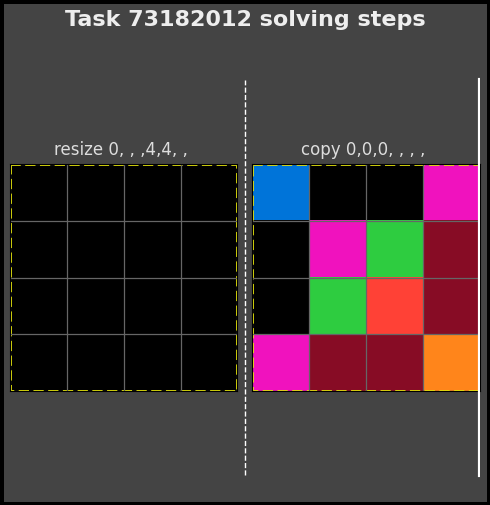

#484, 82819916


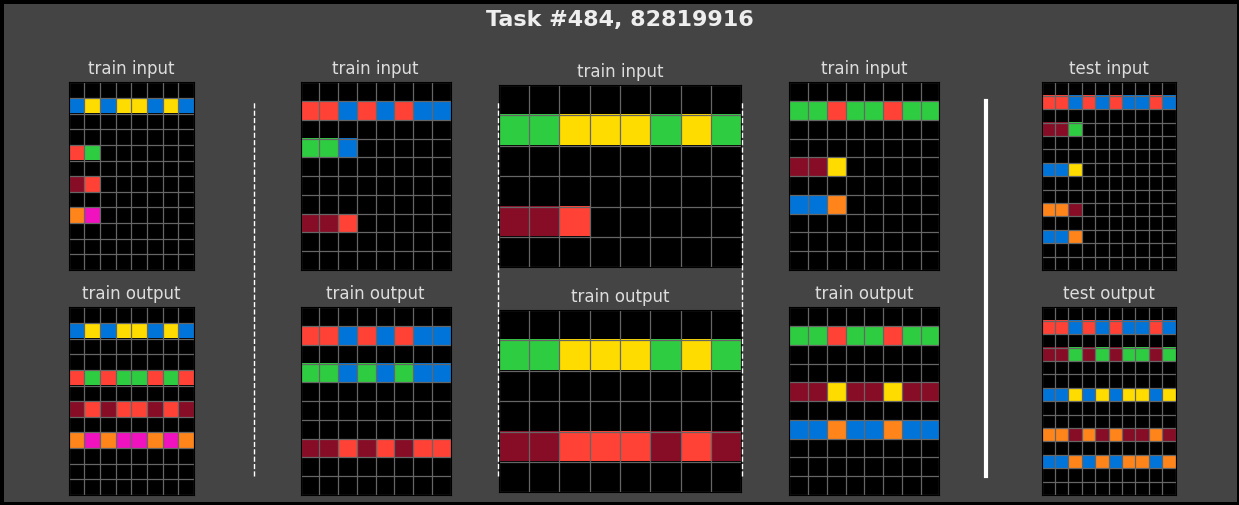

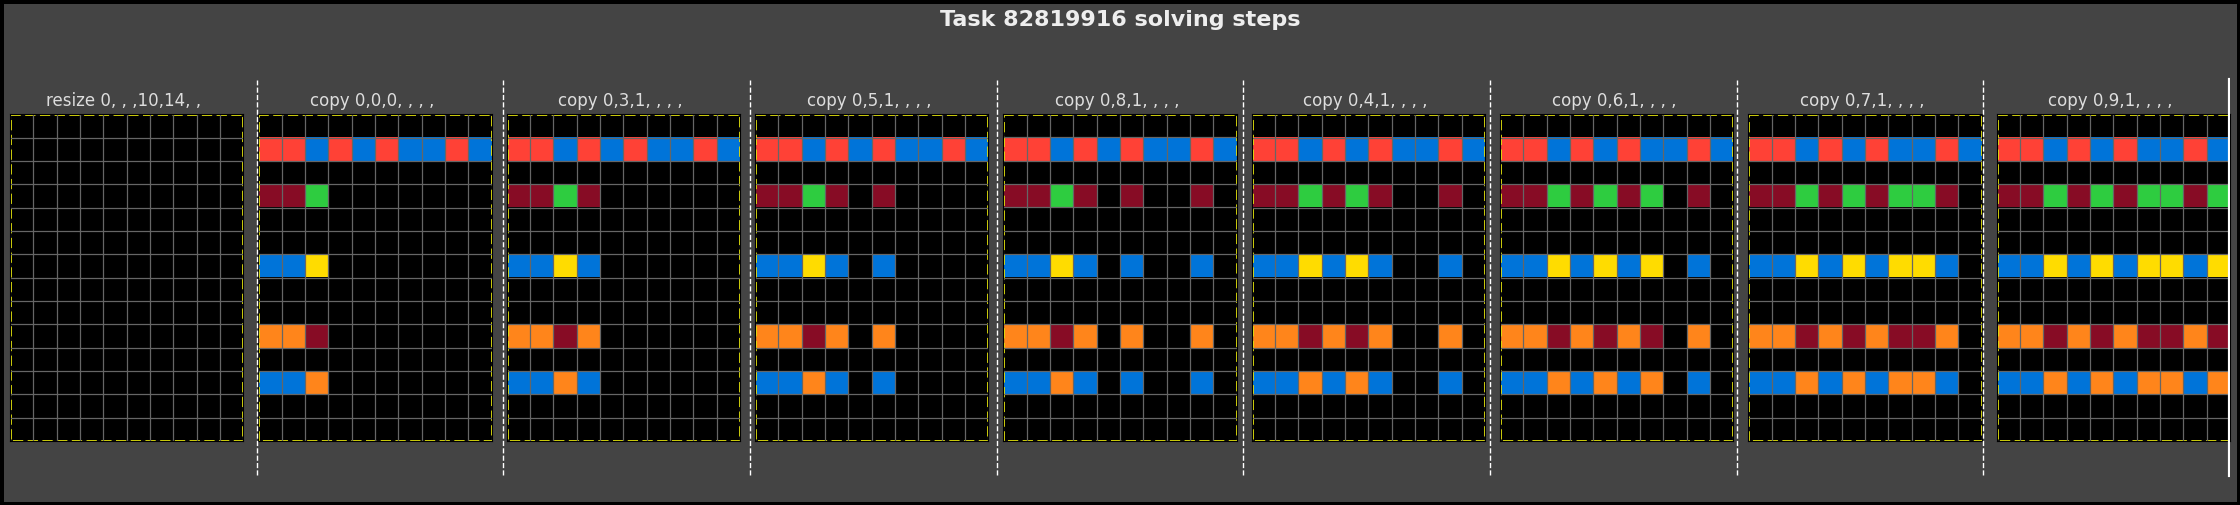

#510, 88207623


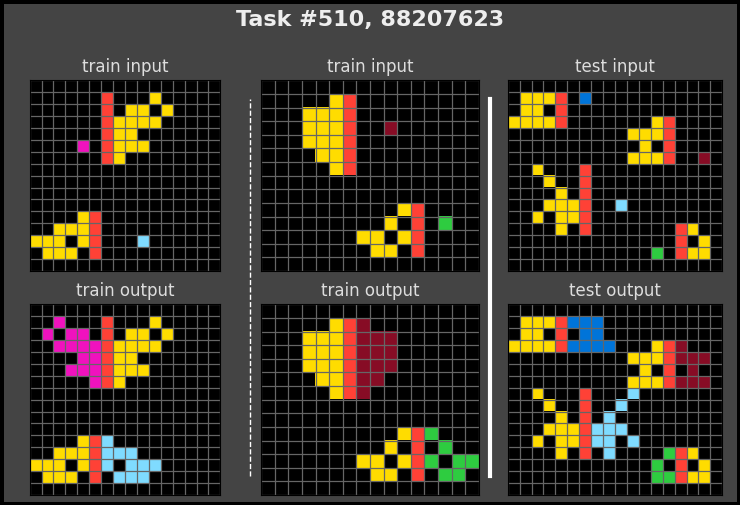

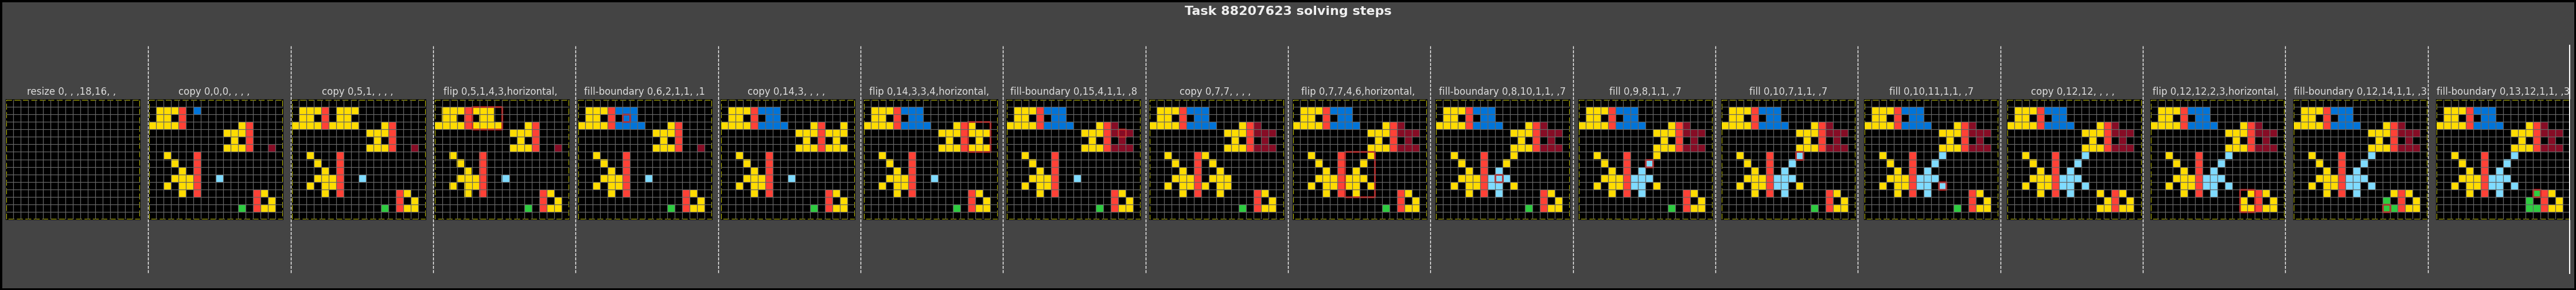

#540, 90347967


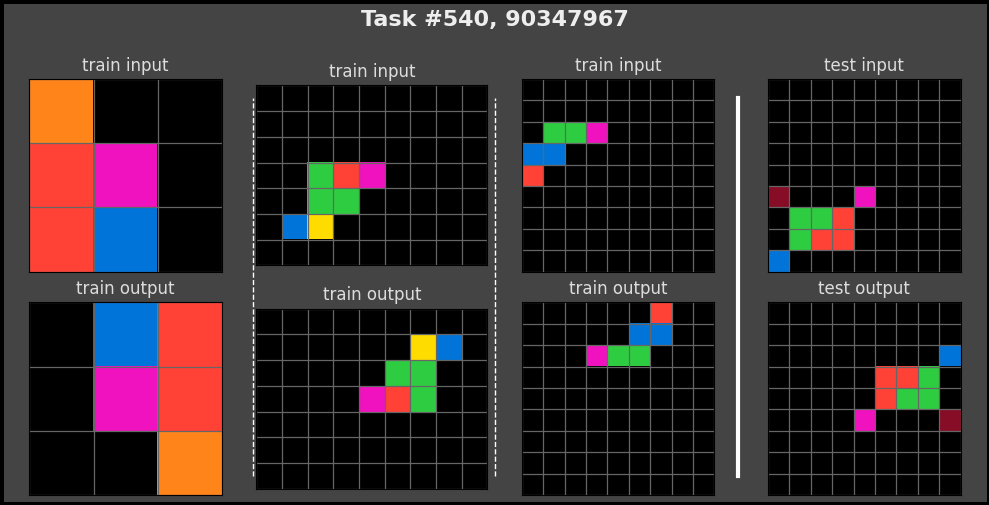

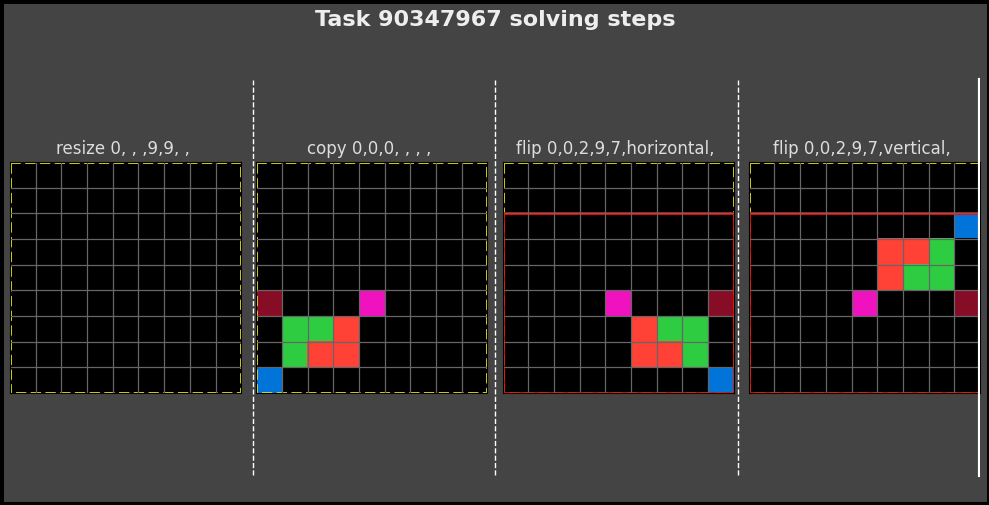

#545, 91413438


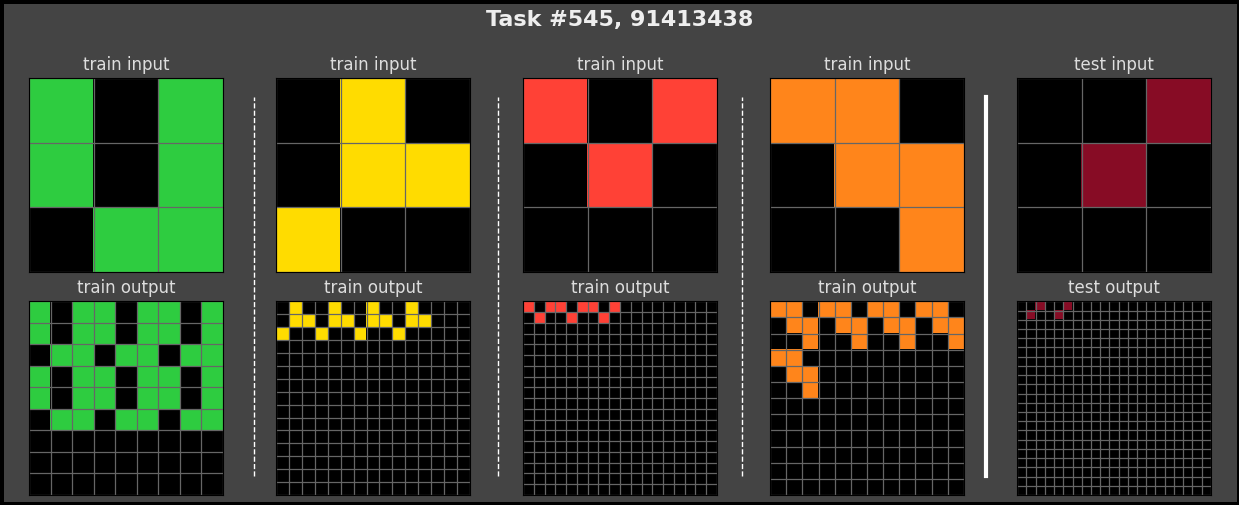

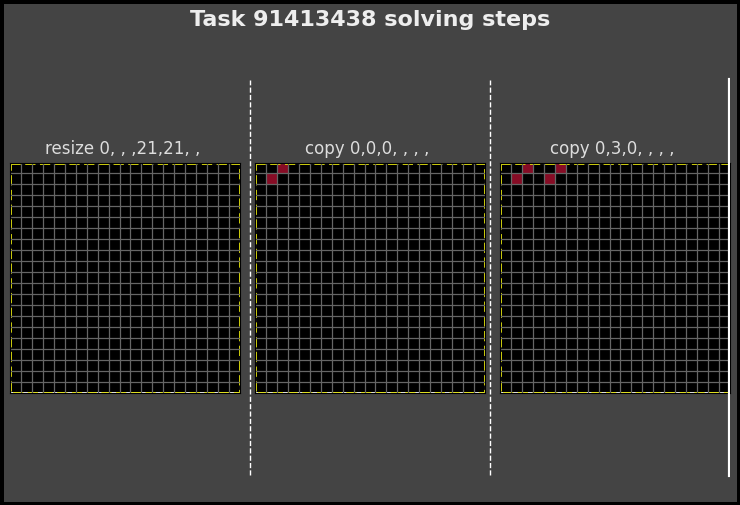

#556, 94133066


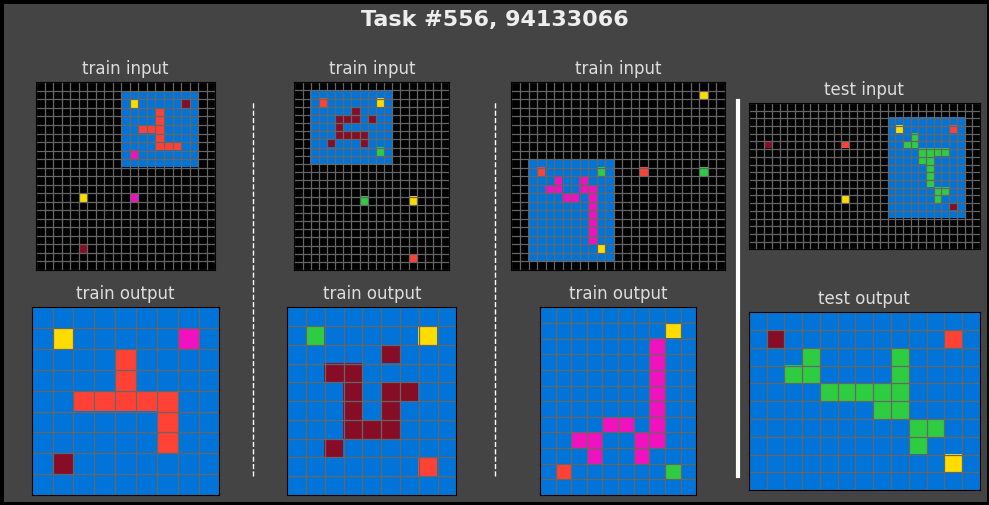

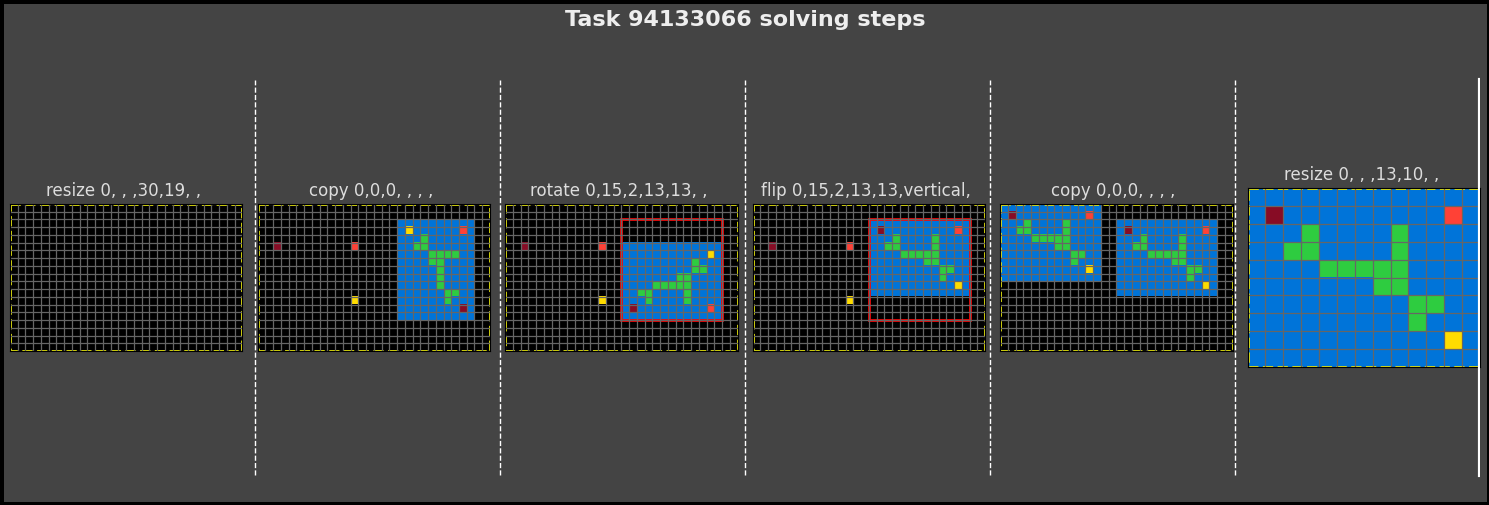

#558, 94414823


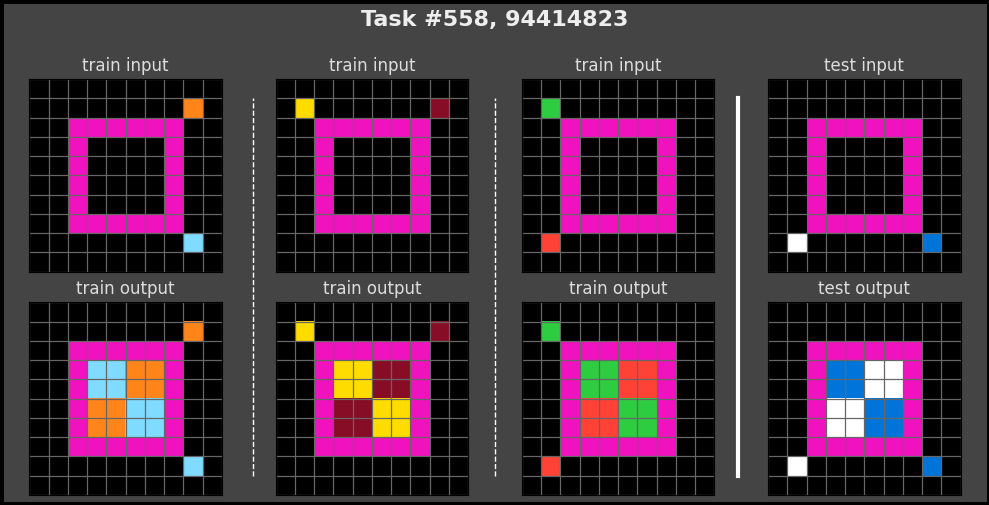

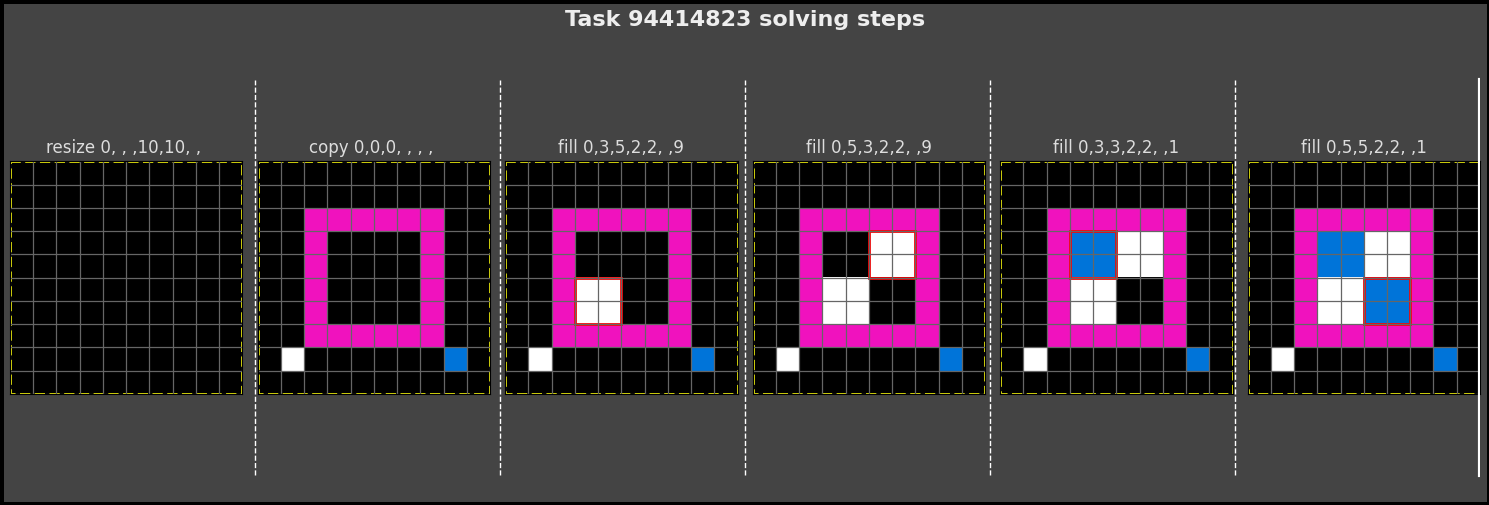

#565, 95990924


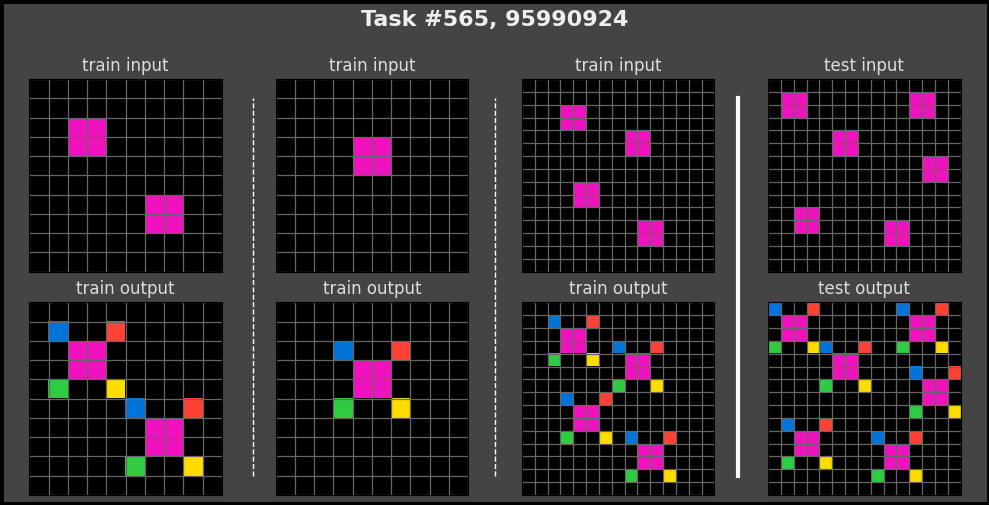

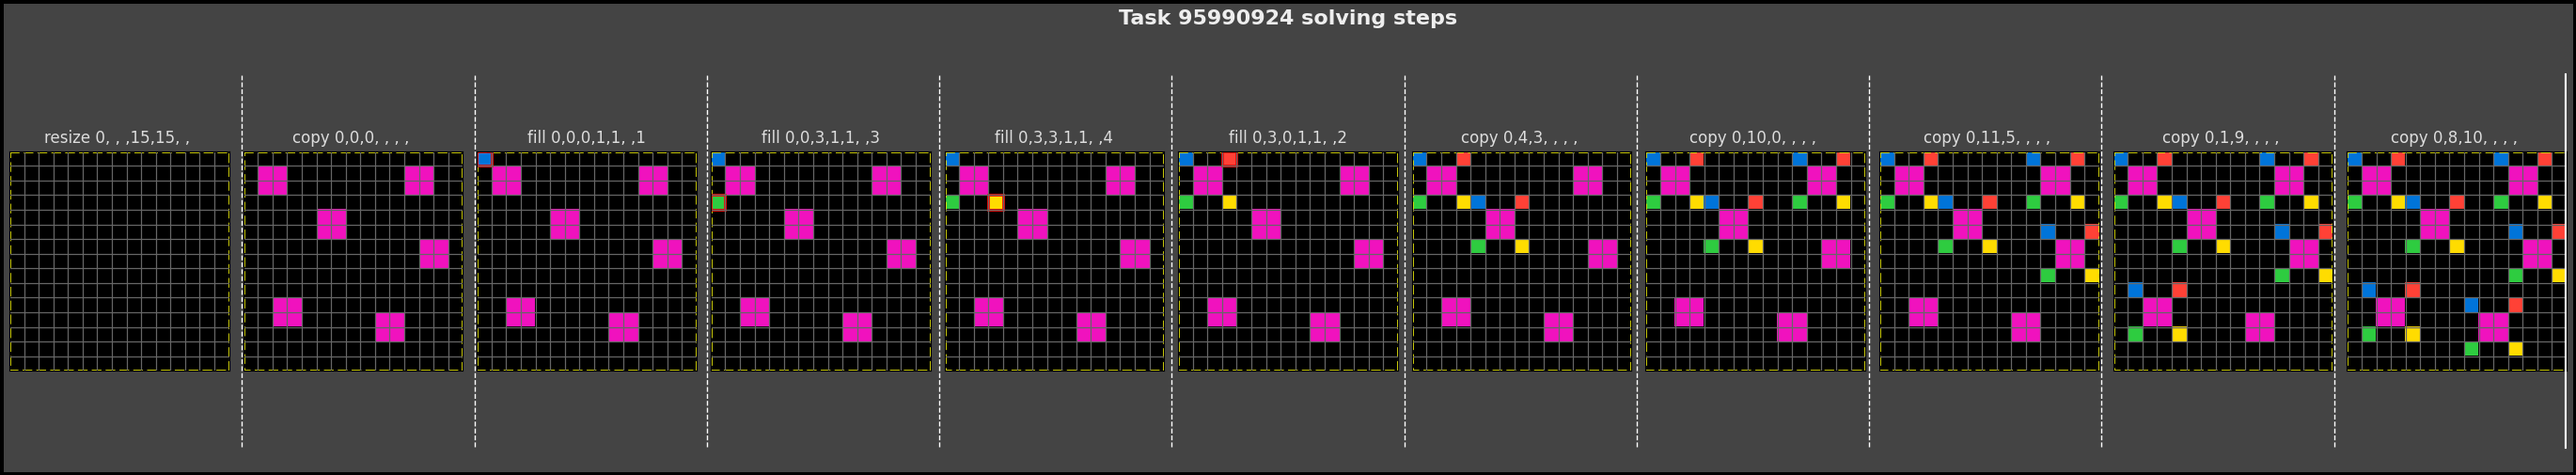

#575, 97999447


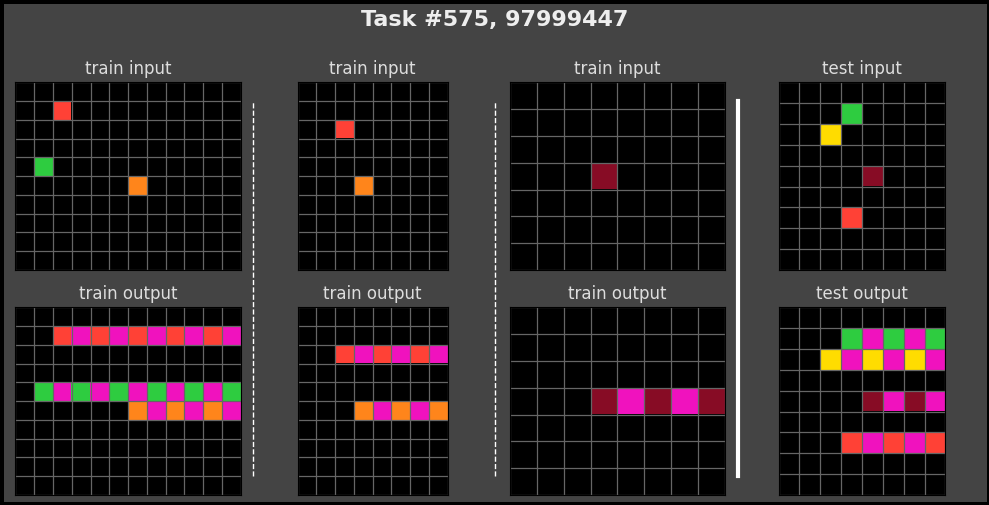

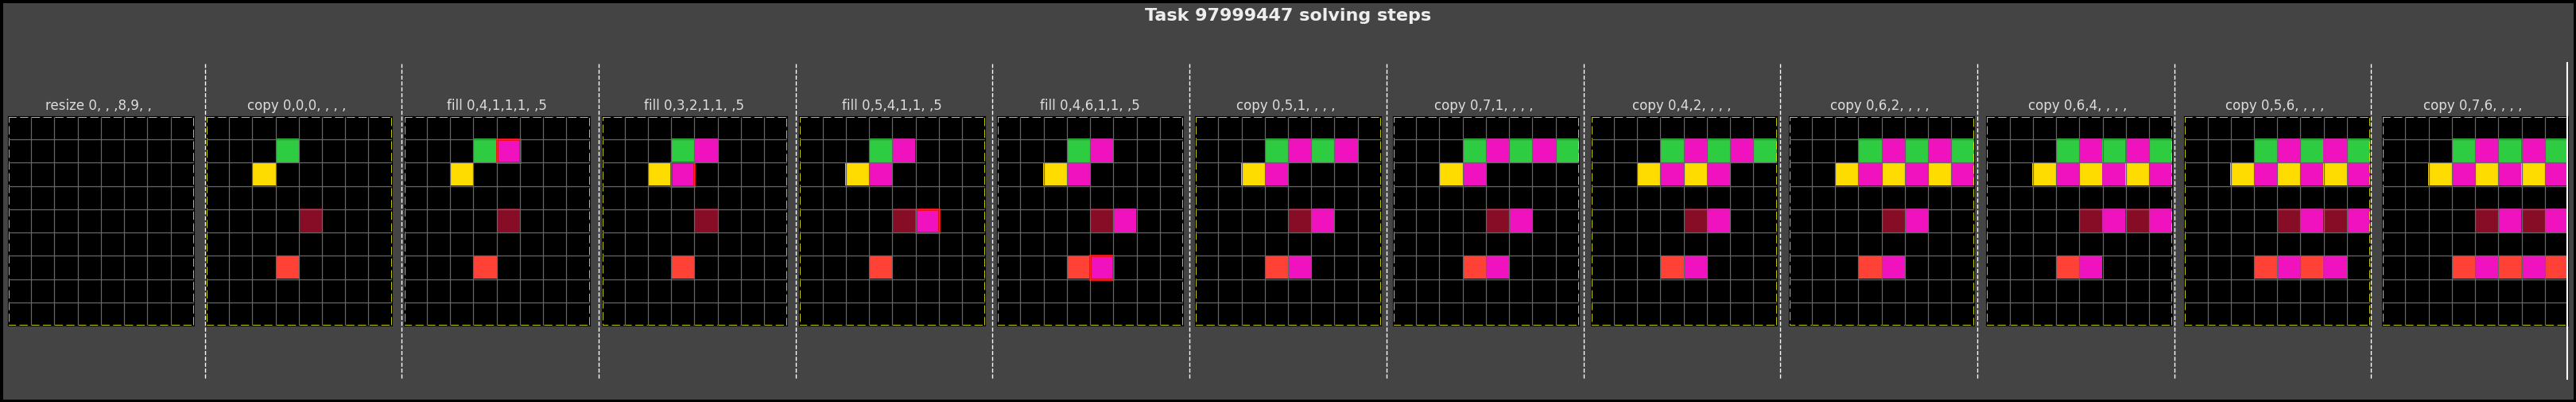

In [24]:
for i in range(0, 1000):
    id=list(training_challenges)[i]
    try:
        with open(f'{id}_steps.json', 'r') as file:
            training_steps = json.load(file)
            steps = training_steps['steps']
            ## ensure the first step is resize to the output size
            # j = 0
            # output_matrices = steps[j]['newOutput']
            # width = len(output_matrices[0][0])
            # height = len(output_matrices[0])
            # action = steps[j]['action']
            # matrixIndex = steps[j].get('matrixIndex', None)
            # if not matrixIndex:
            #     options = steps[j].get('options', {})
            #     position = options.get('position', options.get('to', {}).get('position', None))
            #     if position:
            #         x, y = position.get('x', None), position.get('y', None)
            #         matrixIndex = position.get('matrixIndex', None)
            # if action != 'resize':
            #     first_output_matrices = []
            #     for matrix in output_matrices:
            #         first_output_matrices.append(np.zeros((height, width), dtype=int).tolist())
            #     output_matrices = first_output_matrices
            #     # insert a resize step at the beginning
            #     first_step = {'action': 'resize', 'matrixIndex': matrixIndex, 'options': {'size': {'width': width, 'height': height}}, 'newOutput': output_matrices}
            #     steps.insert(0, first_step)
            #     training_steps['steps'] = steps
            # # write back to json file
            # with open(f'{id}_steps.json', 'w') as file:
            #     json.dump(training_steps, file, indent=4)
            task=training_challenges[id] 
            task_solution = training_solutions[id]
            plot_task(task,  task_solution, i, id)
            plot_steps(steps, id, size=2.5, w1=0.9)
    except FileNotFoundError:
        continue
        # print(f"File {id}_steps.json not found.")
    except json.JSONDecodeError:
        continue
        # print(f"Error decoding JSON from {id}_steps.json.")